## Problem Statement

### Business Context

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.). 



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost. 
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models. 
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

## Importing necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)
from sklearn import metrics

from sklearn.model_selection import train_test_split, StratifiedKFold,KFold,cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# To do hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from imblearn import FunctionSampler
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier 
from lightgbm import LGBMClassifier
#!pip3 install catboost
#from catboost import CatBoostClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To suppress warnings
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

## Loading the dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

import io
data = pd.read_csv(io.BytesIO(uploaded['Train.csv']))

Saving Train.csv to Train.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

import io
data1 = pd.read_csv(io.BytesIO(uploaded['Test.csv']))

Saving Test.csv to Test.csv


In [ ]:
df=data.copy()


In [ ]:
df_test=data1.copy()

## Data Overview

- Observations
- Sanity checks

In [ ]:
# view the first 5 rows of the data
df.head()

V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  \
0 -4.465 -4.679  3.102  0.506 -0.221 -2.033 -2.911  0.051 -1.522  3.762   
1  3.366  3.653  0.910 -1.368  0.332  2.359  0.733 -4.332  0.566 -0.101   
2 -3.832 -5.824  0.634 -2.419 -1.774  1.017 -2.099 -3.173 -2.082  5.393   
3  1.618  1.888  7.046 -1.147  0.083 -1.530  0.207 -2.494  0.345  2.119   
4 -0.111  3.872 -3.758 -2.983  3.793  0.545  0.205  4.849 -1.855 -6.220   

     V11    V12    V13    V14    V15    V16    V17    V18    V19    V20  \
0 -5.715  0.736  0.981  1.418 -3.376 -3.047  0.306  2.914  2.270  4.395   
1  1.914 -0.951 -1.255 -2.707  0.193 -4.769 -2.205  0.908  0.757 -5.834   
2 -0.771  1.107  1.144  0.943 -3.164 -4.248 -4.039  3.689  3.311  1.059   
3 -3.053  0.460  2.705 -0.636 -0.454 -3.174 -3.404 -1.282  1.582 -1.952   
4  1.998  4.724  0.709 -1.989 -2.633  4.184  2.245  3.734 -6.313 -5.380   

     V21    V22    V23    V24    V25    V26    V27    V28    V29    V30  \
0 -2.388  0.646 -1.191  3.133  0.665 -2.511 -0.037  0.726 -3.982 -1.073   
1 -3.065  1.597 -1.757  1.766 -0.267  3.625  1.500 -0.586  0.783 -0.201   
2 -2.143  1.650 -1.661  1.680 -0.451 -4.551  3.739  1.134 -2.034  0.841   
3 -3.517 -1.206 -5.628 -1.818  2.124  5.295  4.748 -2.309 -3.963 -6.029   
4 -0.887  2.062  9.446  4.490 -3.945  4.582 -8.780 -3.383  5.107  6.788   

     V31    V32    V33     V34   V35    V36    V37    V38    V39    V40  \
0  1.667  3.060 -1.690   2.846 2.235  6.667  0.444 -2.369  2.951 -3.480   
1  0.025 -1.795  3.033  -2.468 1.895 -2.298 -1.731  5.909 -0.386  0.616   
2 -1.600 -0.257  0.804   4.086 2.292  5.361  0.352  2.940  3.839 -4.309   
3  4.949 -3.584 -2.577   1.364 0.623  5.550 -1.527  0.139  3.101 -1.277   
4  2.044  8.266  6.629 -10.069 1.223 -3.230  1.687 -2.164 -3.645  6.510   

   Target  
0       0  
1       0  
2       0  
3       0  
4       0

In [ ]:
# view the first 5 rows of the data
df_test.head()

V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  \
0 -0.613 -3.820  2.202  1.300 -1.185 -4.496 -1.836  4.723  1.206 -0.342   
1  0.390 -0.512  0.527 -2.577 -1.017  2.235 -0.441 -4.406 -0.333  1.967   
2 -0.875 -0.641  4.084 -1.590  0.526 -1.958 -0.695  1.347 -1.732  0.466   
3  0.238  1.459  4.015  2.534  1.197 -3.117 -0.924  0.269  1.322  0.702   
4  5.828  2.768 -1.235  2.809 -1.642 -1.407  0.569  0.965  1.918 -2.775   

     V11    V12    V13    V14    V15    V16    V17    V18    V19    V20  \
0 -5.123  1.017  4.819  3.269 -2.984  1.387  2.032 -0.512 -1.023  7.339   
1  1.797  0.410  0.638 -1.390 -1.883 -5.018 -3.827  2.418  1.762 -3.242   
2 -4.928  3.565 -0.449 -0.656 -0.167 -1.630  2.292  2.396  0.601  1.794   
3 -5.578 -0.851  2.591  0.767 -2.391 -2.342  0.572 -0.934  0.509  1.211   
4 -0.530  1.375 -0.651 -1.679 -0.379 -4.443  3.894 -0.608  2.945  0.367   

     V21   V22    V23    V24    V25    V26    V27    V28    V29    V30    V31  \
0 -2.242 0.155  2.054 -2.772  1.851 -1.789 -0.277 -1.255 -3.833 -1.505  1.587   
1 -3.193 1.857 -1.708  0.633 -0.588  0.084  3.014 -0.182  0.224  0.865 -1.782   
2 -2.120 0.482 -0.841  1.790  1.874  0.364 -0.169 -0.484 -2.119 -2.157  2.907   
3 -3.260 0.105 -0.659  1.498  1.100  4.143 -0.248 -1.137 -5.356 -4.546  3.809   
4 -5.789 4.598  4.450  3.225  0.397  0.248 -2.362  1.079 -0.473  2.243 -3.591   

     V32    V33    V34   V35    V36    V37     V38    V39    V40  Target  
0  2.291 -5.411  0.870 0.574  4.157  1.428 -10.511  0.455 -1.448       0  
1 -2.475  2.494  0.315 2.059  0.684 -0.485   5.128  1.721 -1.488       0  
2 -1.319 -2.997  0.460 0.620  5.632  1.324  -1.752  1.808  1.676       0  
3  3.518 -3.074 -0.284 0.955  3.029 -1.367  -3.412  0.906 -2.451       0  
4  1.774 -1.502 -2.227 4.777 -6.560 -0.806  -0.276 -3.858 -0.538       0

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

In [ ]:
# Checking the statistical summary of the data, "include='all'" will bring in also categorical columns and ".T" will change colums to rows and rows to columns
df.describe(include='all').T

count   mean   std     min    25%    50%    75%    max
V1     19982.000 -0.272 3.442 -11.876 -2.737 -0.748  1.840 15.493
V2     19982.000  0.440 3.151 -12.320 -1.641  0.472  2.544 13.089
V3     20000.000  2.485 3.389 -10.708  0.207  2.256  4.566 17.091
V4     20000.000 -0.083 3.432 -15.082 -2.348 -0.135  2.131 13.236
V5     20000.000 -0.054 2.105  -8.603 -1.536 -0.102  1.340  8.134
V6     20000.000 -0.995 2.041 -10.227 -2.347 -1.001  0.380  6.976
V7     20000.000 -0.879 1.762  -7.950 -2.031 -0.917  0.224  8.006
V8     20000.000 -0.548 3.296 -15.658 -2.643 -0.389  1.723 11.679
V9     20000.000 -0.017 2.161  -8.596 -1.495 -0.068  1.409  8.138
V10    20000.000 -0.013 2.193  -9.854 -1.411  0.101  1.477  8.108
V11    20000.000 -1.895 3.124 -14.832 -3.922 -1.921  0.119 11.826
V12    20000.000  1.605 2.930 -12.948 -0.397  1.508  3.571 15.081
V13    20000.000  1.580 2.875 -13.228 -0.224  1.637  3.460 15.420
V14    20000.000 -0.951 1.790  -7.739 -2.171 -0.957  0.271  5.671
V15    20000.000 -2.415 3.355 -16.417 -4.415 -2.383 -0.359 12.246
V16    20000.000 -2.925 4.222 -20.374 -5.634 -2.683 -0.095 13.583
V17    20000.000 -0.134 3.345 -14.091 -2.216 -0.015  2.069 16.756
V18    20000.000  1.189 2.592 -11.644 -0.404  0.883  2.572 13.180
V19    20000.000  1.182 3.397 -13.492 -1.050  1.279  3.493 13.238
V20    20000.000  0.024 3.669 -13.923 -2.433  0.033  2.512 16.052
V21    20000.000 -3.611 3.568 -17.956 -5.930 -3.533 -1.266 13.840
V22    20000.000  0.952 1.652 -10.122 -0.118  0.975  2.026  7.410
V23    20000.000 -0.366 4.032 -14.866 -3.099 -0.262  2.452 14.459
V24    20000.000  1.134 3.912 -16.387 -1.468  0.969  3.546 17.163
V25    20000.000 -0.002 2.017  -8.228 -1.365  0.025  1.397  8.223
V26    20000.000  1.874 3.435 -11.834 -0.338  1.951  4.130 16.836
V27    20000.000 -0.612 4.369 -14.905 -3.652 -0.885  2.189 17.560
V28    20000.000 -0.883 1.918  -9.269 -2.171 -0.891  0.376  6.528
V29    20000.000 -0.986 2.684 -12.579 -2.787 -1.176  0.630 10.722
V30    20000.000 -0.016 3.005 -14.796 -1.867  0.184  2.036 12.506
V31    20000.000  0.487 3.461 -13.723 -1.818  0.490  2.731 17.255
V32    20000.000  0.304 5.500 -19.877 -3.420  0.052  3.762 23.633
V33    20000.000  0.050 3.575 -16.898 -2.243 -0.066  2.255 16.692
V34    20000.000 -0.463 3.184 -17.985 -2.137 -0.255  1.437 14.358
V35    20000.000  2.230 2.937 -15.350  0.336  2.099  4.064 15.291
V36    20000.000  1.515 3.801 -14.833 -0.944  1.567  3.984 19.330
V37    20000.000  0.011 1.788  -5.478 -1.256 -0.128  1.176  7.467
V38    20000.000 -0.344 3.948 -17.375 -2.988 -0.317  2.279 15.290
V39    20000.000  0.891 1.753  -6.439 -0.272  0.919  2.058  7.760
V40    20000.000 -0.876 3.012 -11.024 -2.940 -0.921  1.120 10.654
Target 20000.000  0.056 0.229   0.000  0.000  0.000  0.000  1.000

Observation:

* We have some missing values in V1 and V2

In [ ]:
# Checking if there are duplicate rows
df.duplicated().sum()

0

In [ ]:
# checking for missing values in the training data
(df.isnull().sum()/df.isnull().count())

V1       0.001
V2       0.001
V3       0.000
V4       0.000
V5       0.000
V6       0.000
V7       0.000
V8       0.000
V9       0.000
V10      0.000
V11      0.000
V12      0.000
V13      0.000
V14      0.000
V15      0.000
V16      0.000
V17      0.000
V18      0.000
V19      0.000
V20      0.000
V21      0.000
V22      0.000
V23      0.000
V24      0.000
V25      0.000
V26      0.000
V27      0.000
V28      0.000
V29      0.000
V30      0.000
V31      0.000
V32      0.000
V33      0.000
V34      0.000
V35      0.000
V36      0.000
V37      0.000
V38      0.000
V39      0.000
V40      0.000
Target   0.000
dtype: float64

Observation:

* V1 and V2 have 0.9% missing values out of the total values

In [ ]:
# checking for missing values in the testing data
df_test.isnull().sum()/df_test.isnull().count()*100

V1       0.100
V2       0.120
V3       0.000
V4       0.000
V5       0.000
V6       0.000
V7       0.000
V8       0.000
V9       0.000
V10      0.000
V11      0.000
V12      0.000
V13      0.000
V14      0.000
V15      0.000
V16      0.000
V17      0.000
V18      0.000
V19      0.000
V20      0.000
V21      0.000
V22      0.000
V23      0.000
V24      0.000
V25      0.000
V26      0.000
V27      0.000
V28      0.000
V29      0.000
V30      0.000
V31      0.000
V32      0.000
V33      0.000
V34      0.000
V35      0.000
V36      0.000
V37      0.000
V38      0.000
V39      0.000
V40      0.000
Target   0.000
dtype: float64

Observation:

* V1 has 10% and V2 has 12% missing values out of the total values

## Exploratory Data Analysis (EDA)

### Plotting histograms and boxplots for all the variables

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Plotting all the features at one go

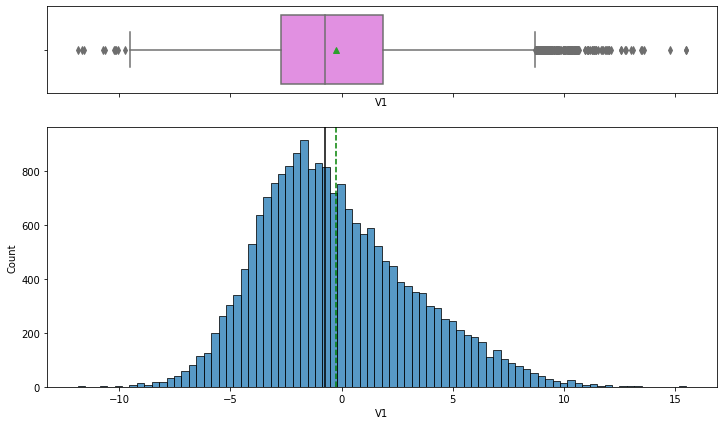

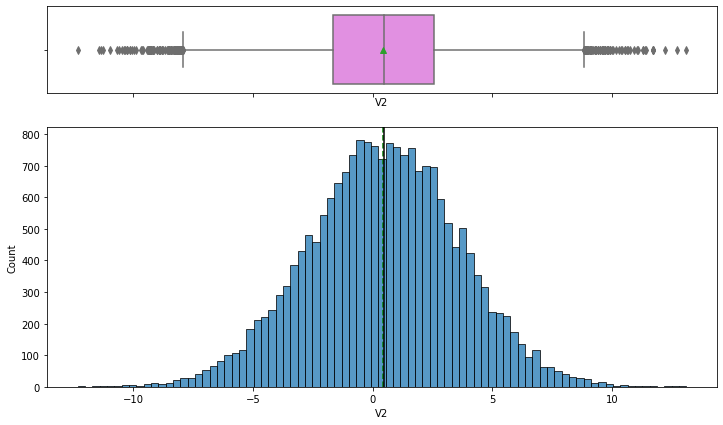

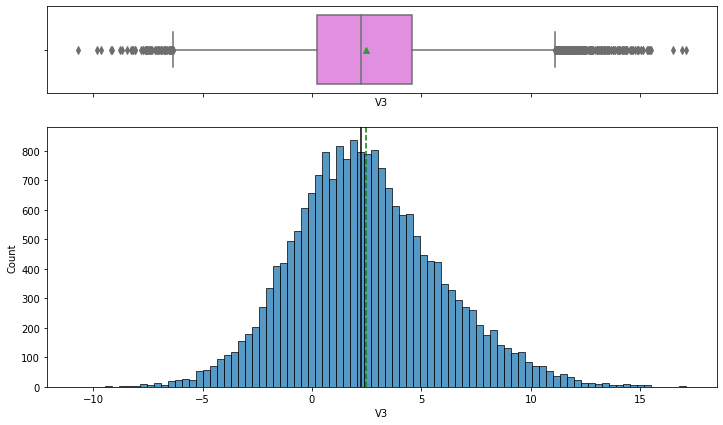

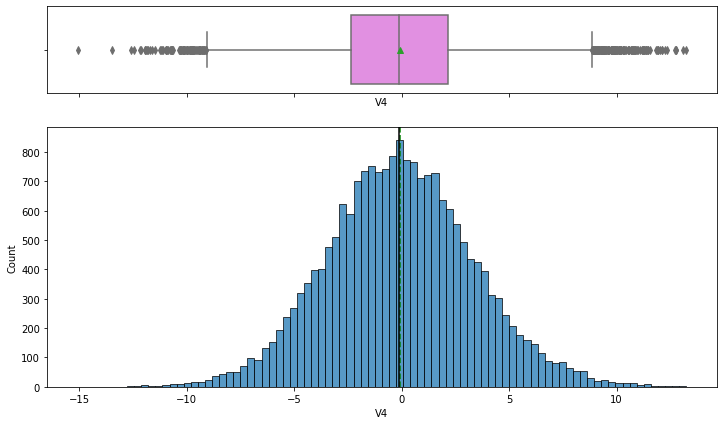

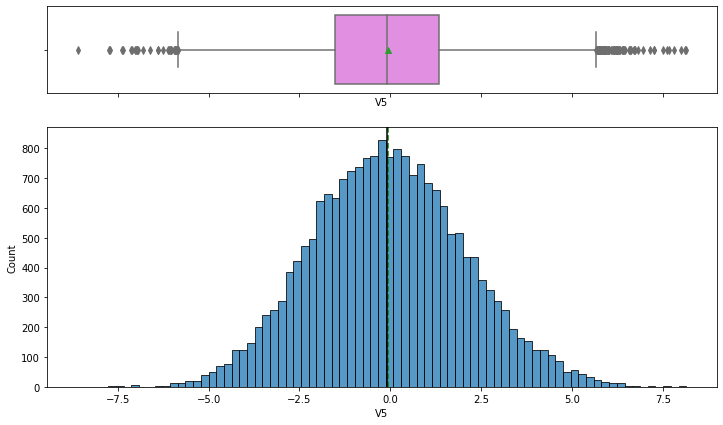

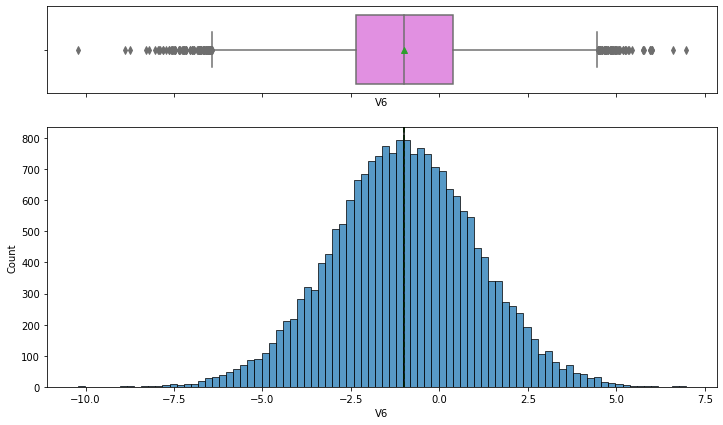

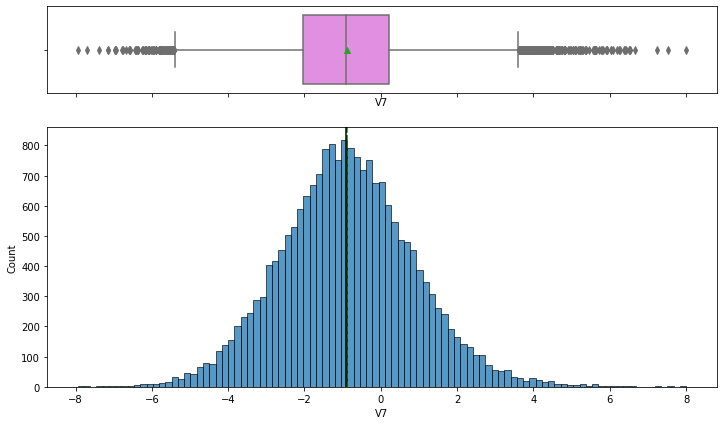

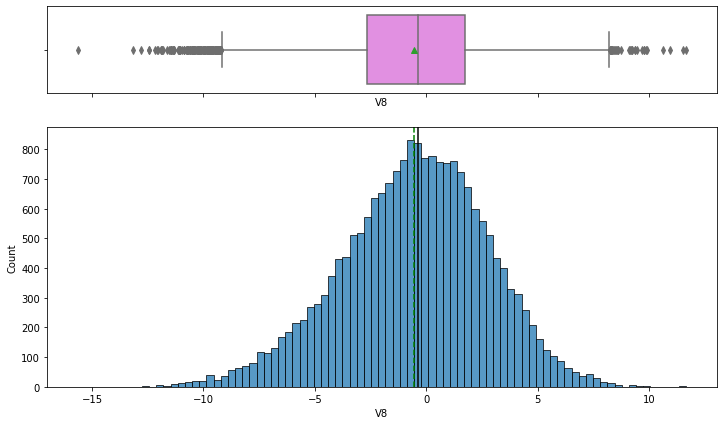

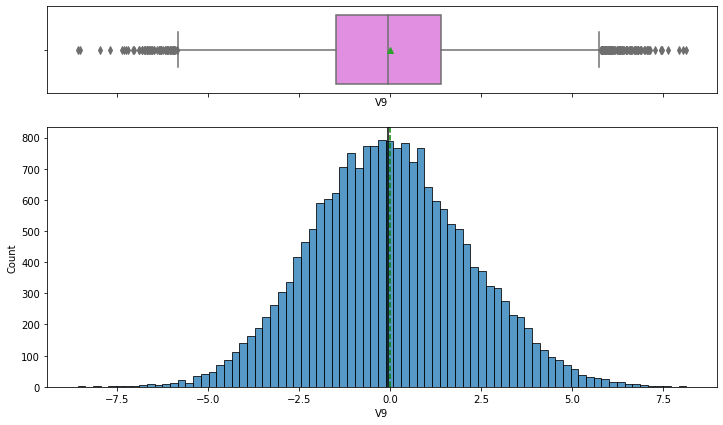

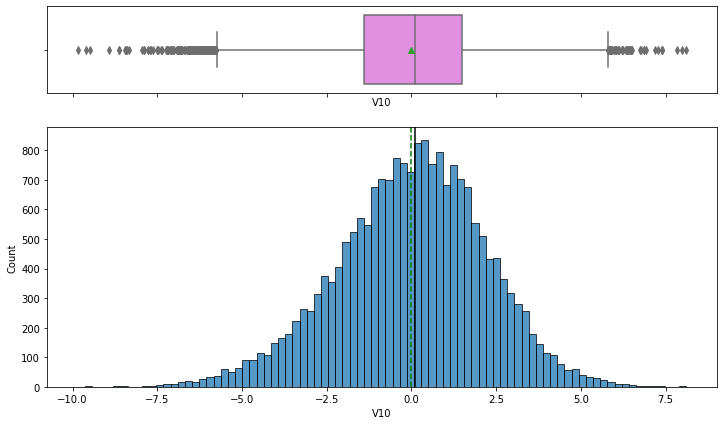

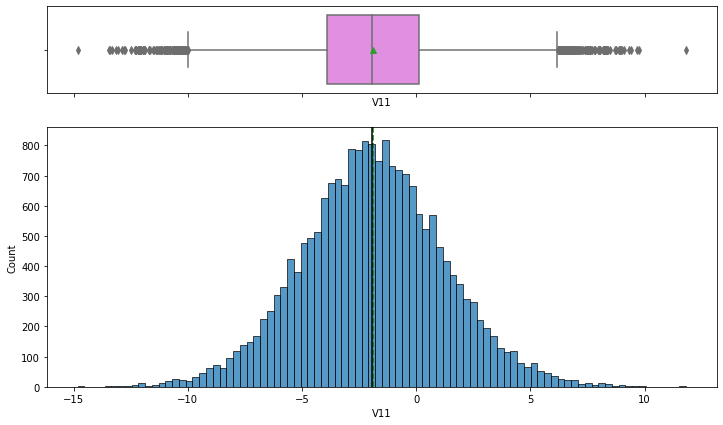

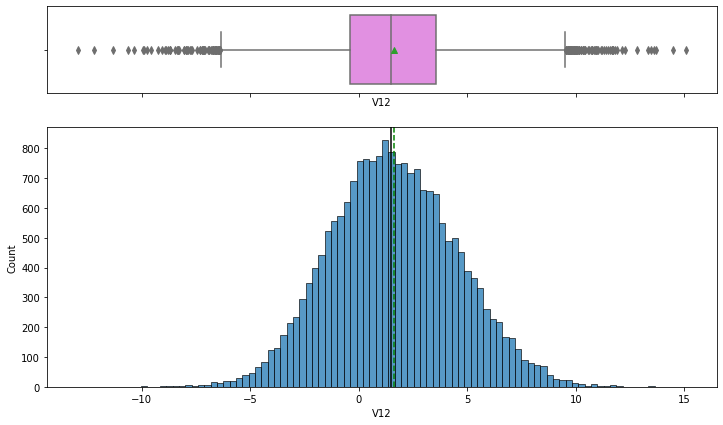

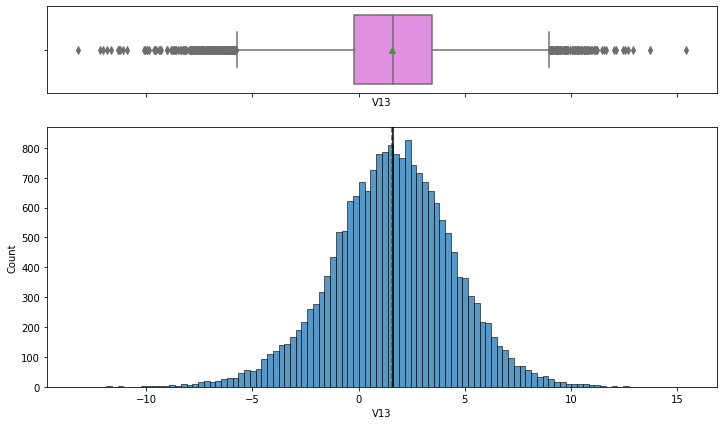

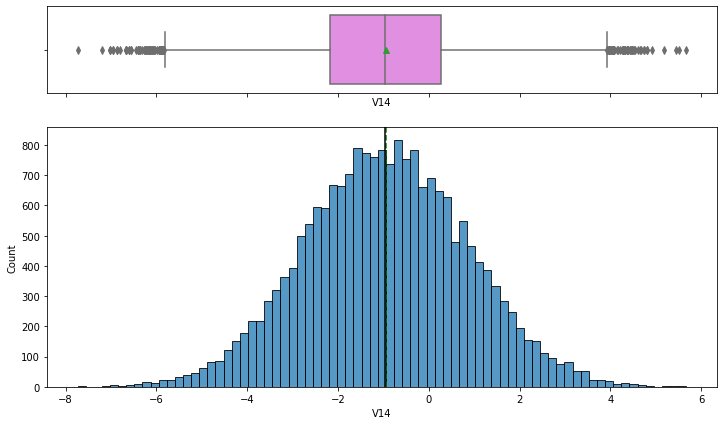

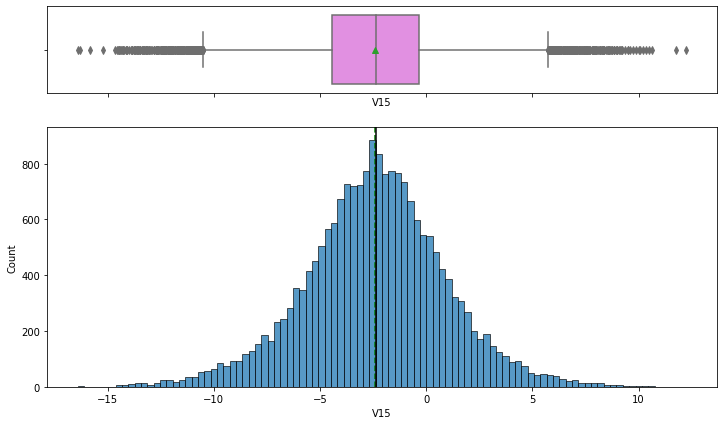

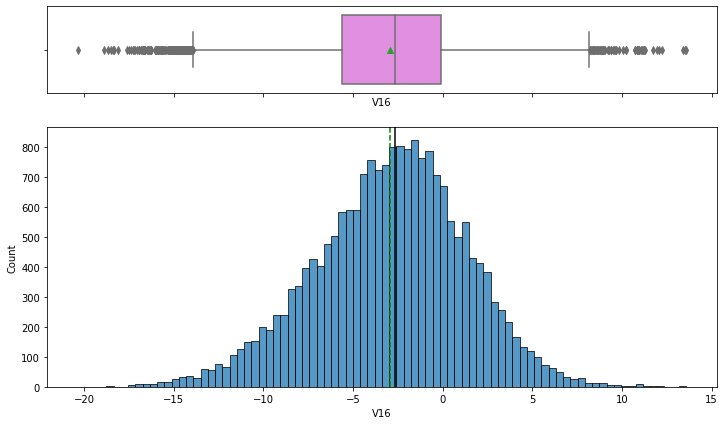

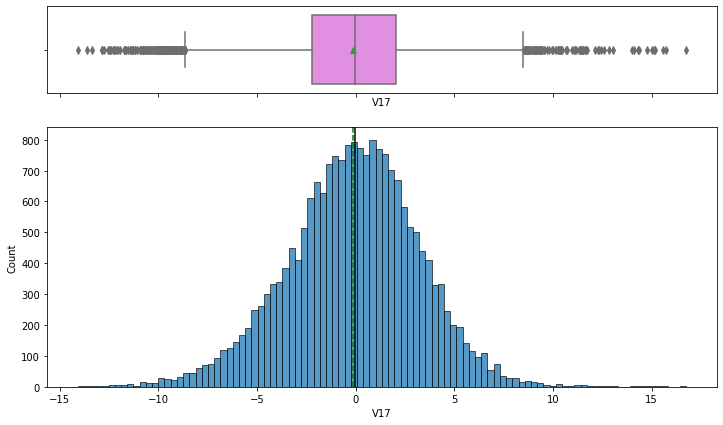

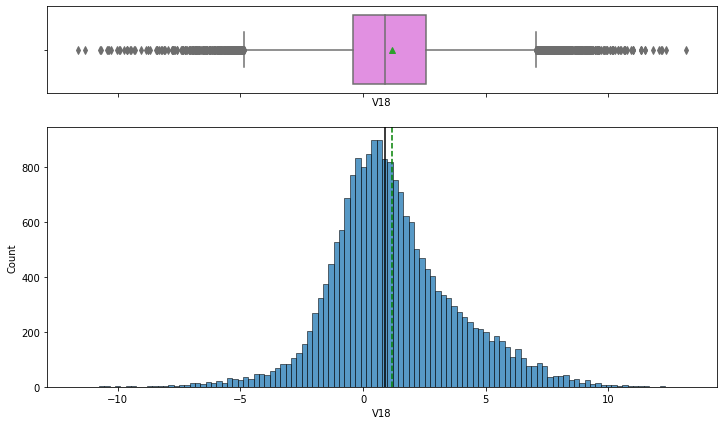

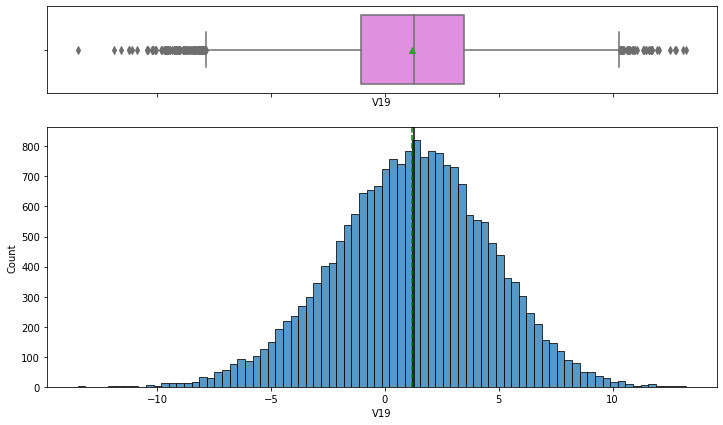

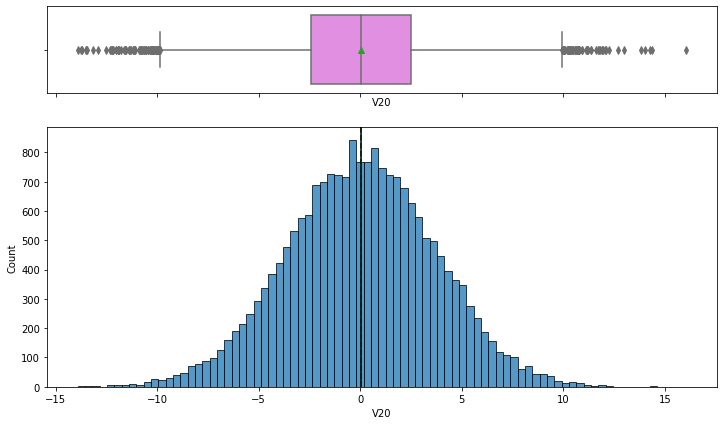

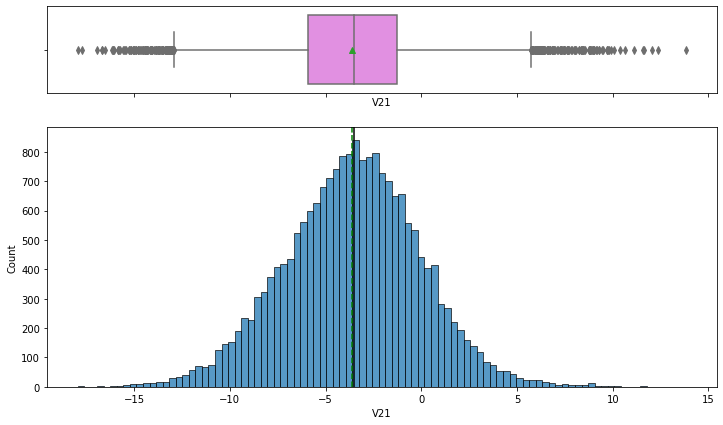

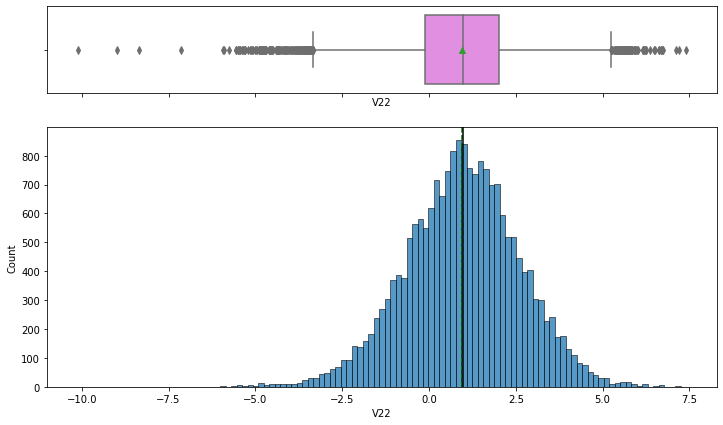

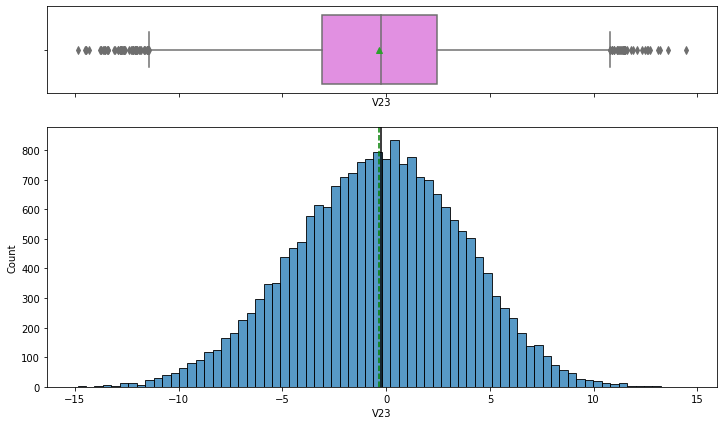

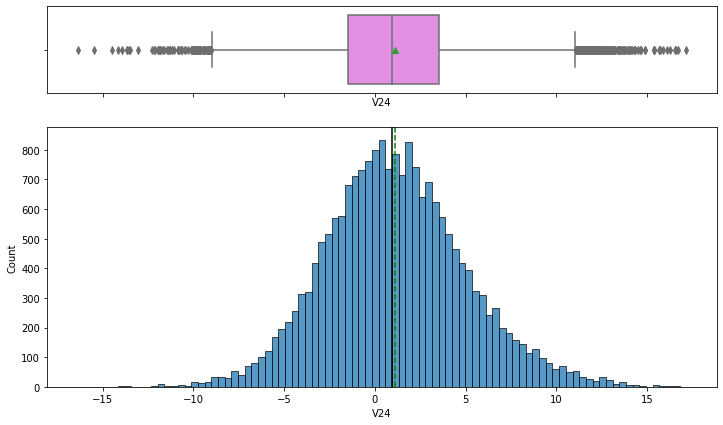

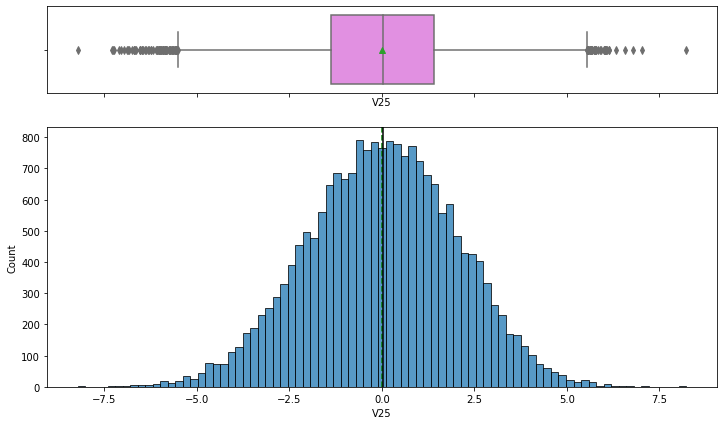

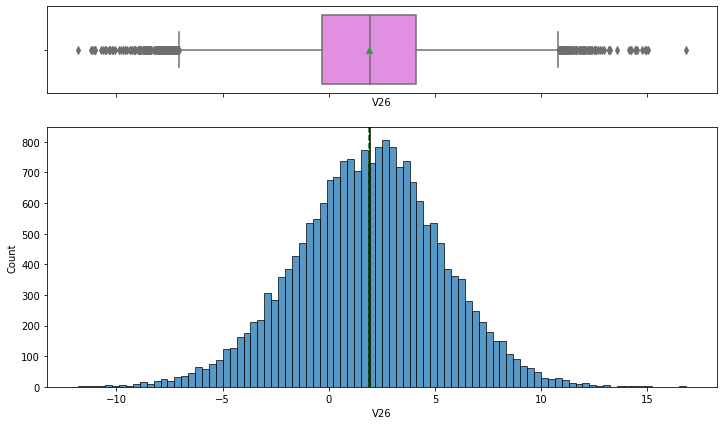

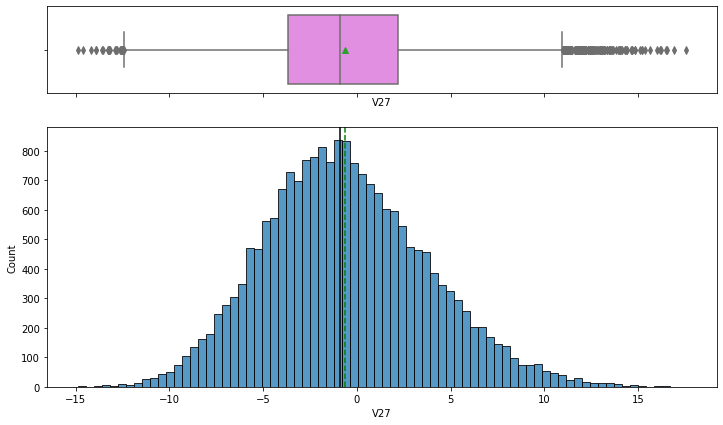

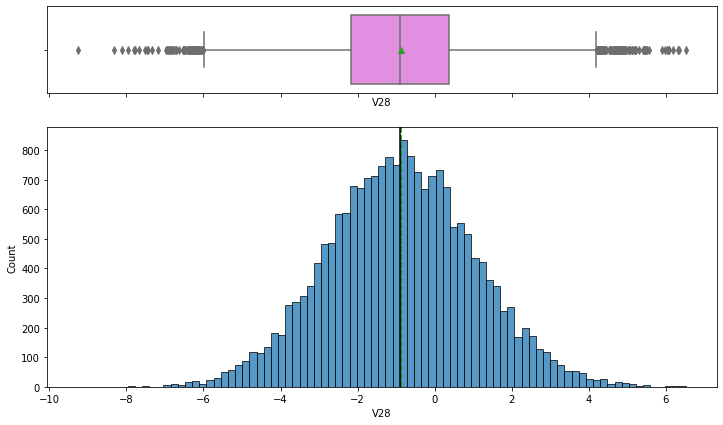

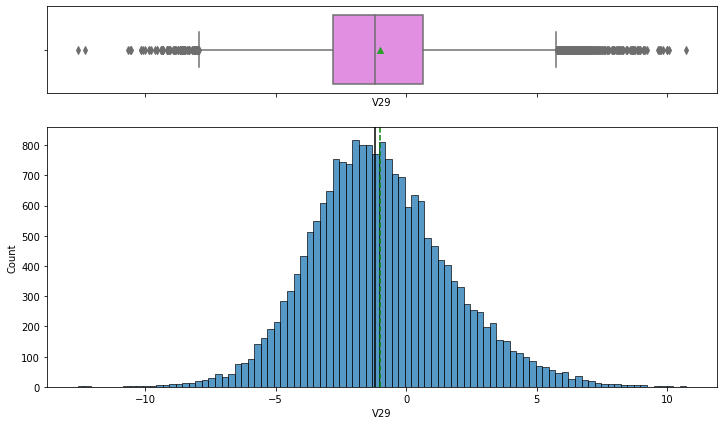

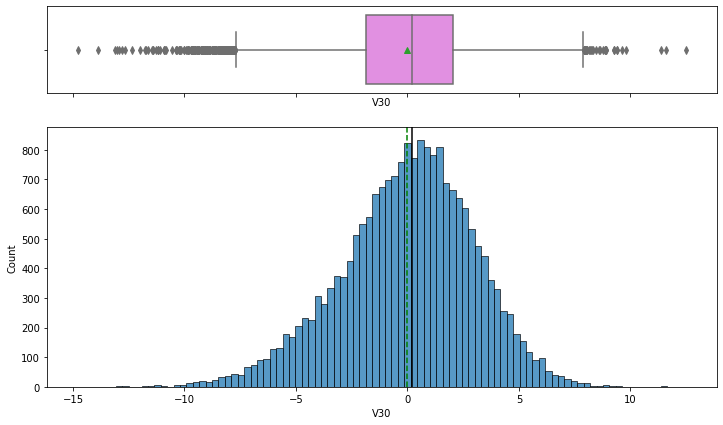

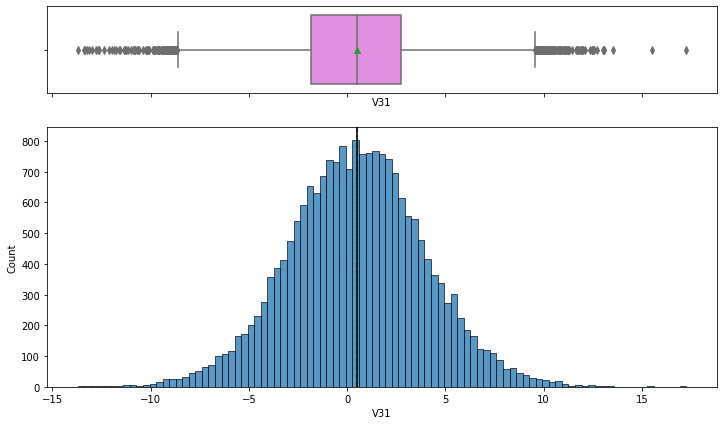

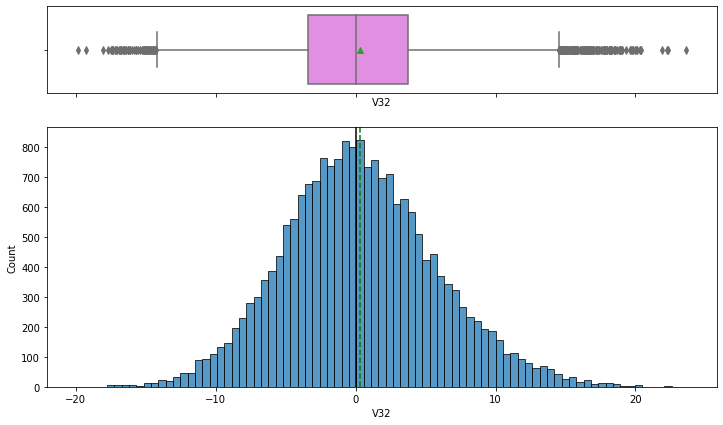

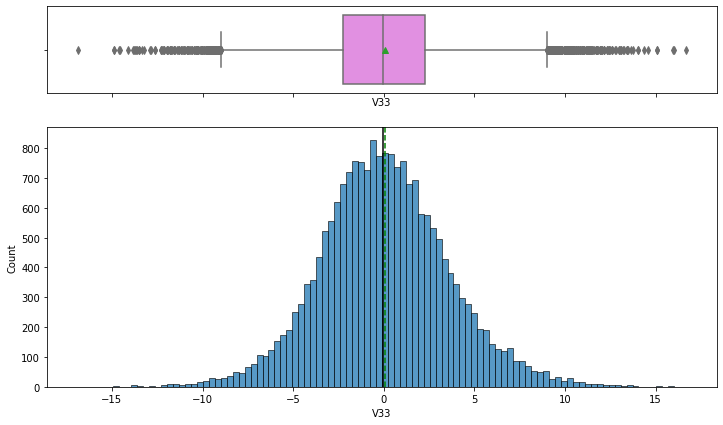

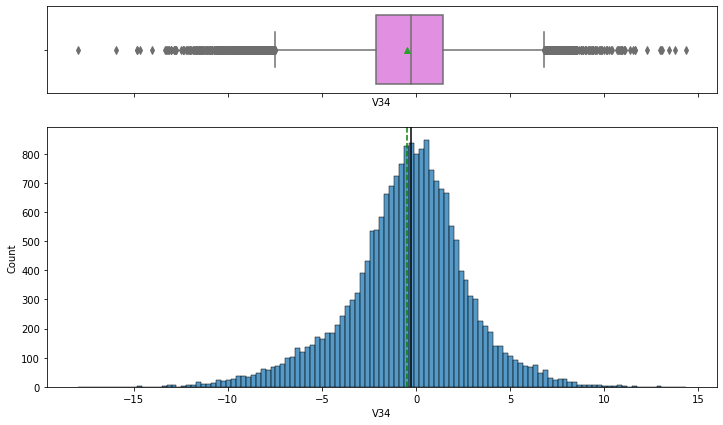

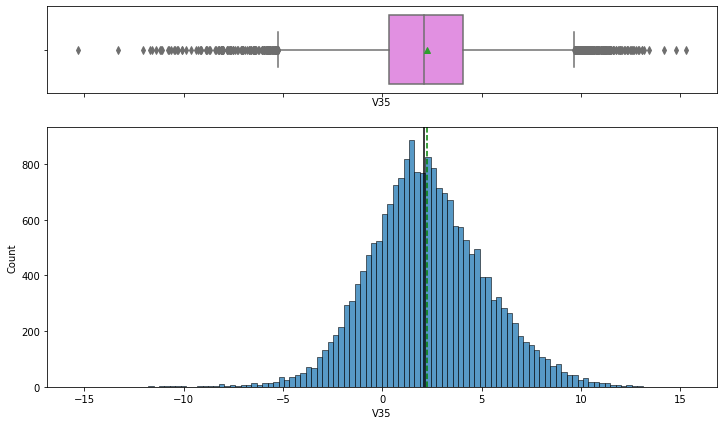

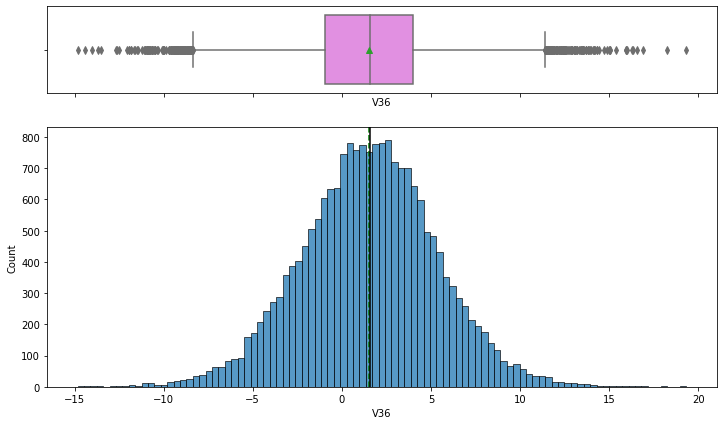

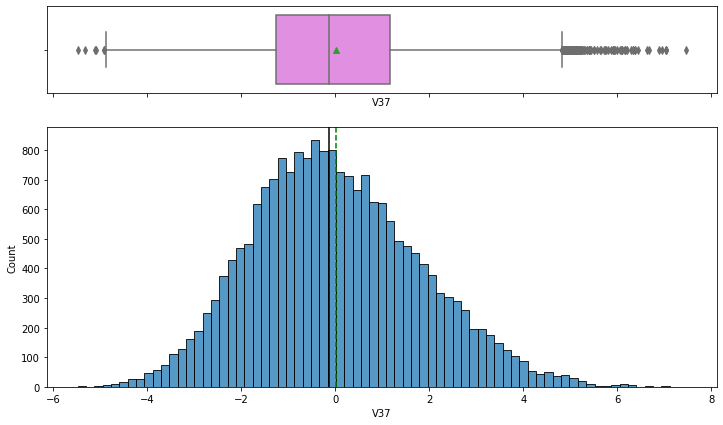

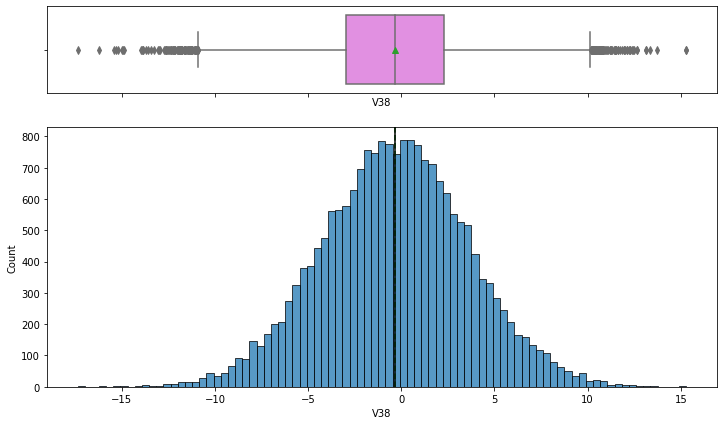

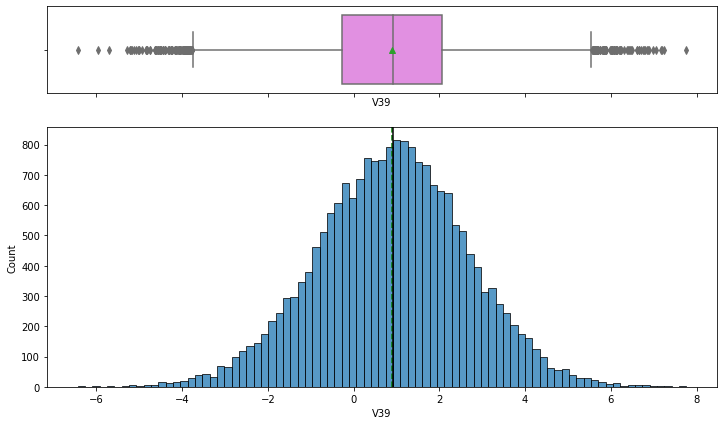

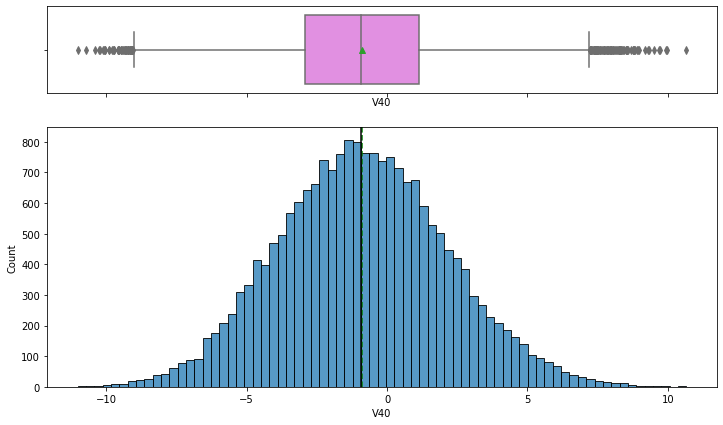

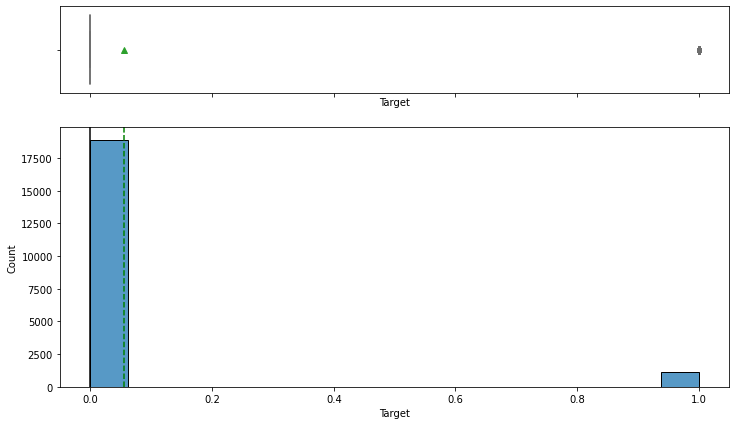

In [ ]:
for feature in df.columns:
    histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None) 

Observation:

* All variables have outliers both in upper and lower side
* All variables are almost normally distribute


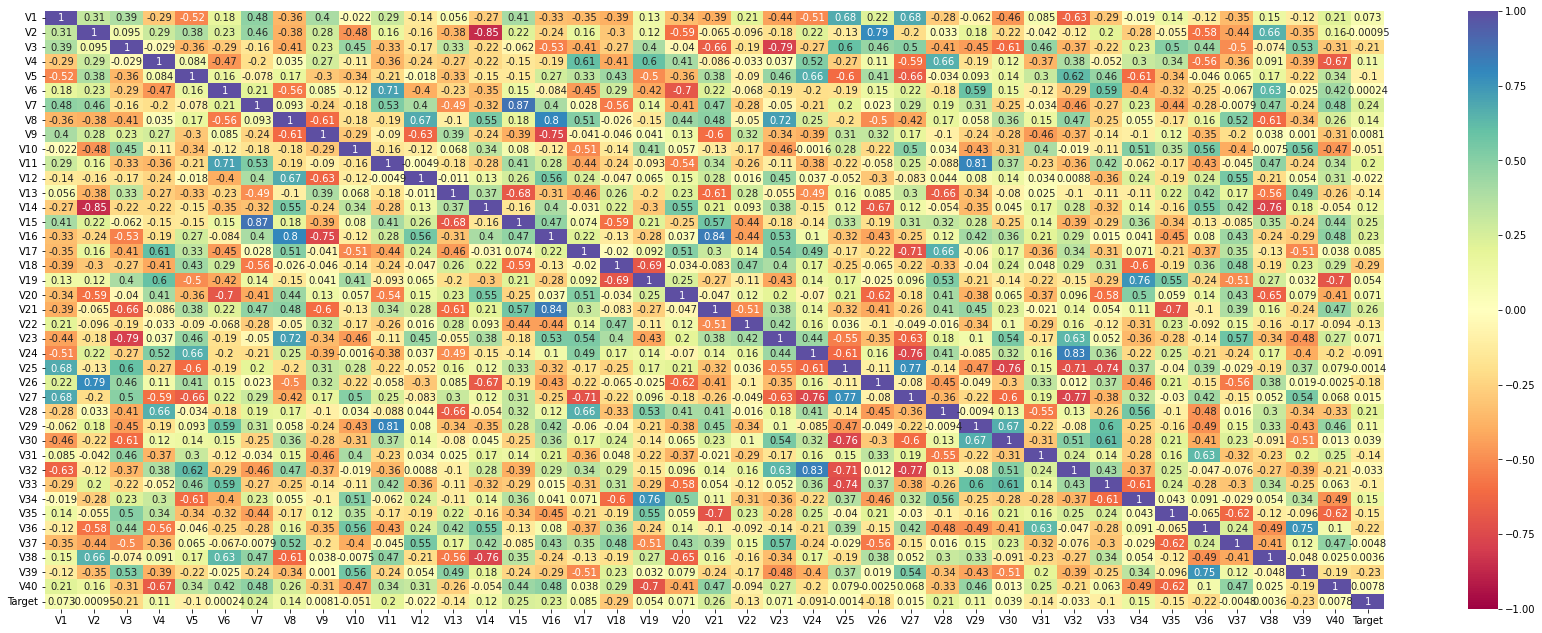

In [ ]:
# Heatmap to check the correlation between numerical data
plt.figure(figsize=(30, 11))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

Observation:

* There is no strong correlation between target variable and predictors

* V14 is negatively correlated to V2 at 85%

* V15 is positively correlated to V7 at 87%

* V11 is positively correlated to V5 at 71%

* V16 is positively correlated to V8 at 80%

* V16 is negatively correlated to V9 at 75%

* V21 is positively correlated to V16 at 84%

* V29 is positively correlated to V11 at 81%

* V32 is positively correlated to V24 at 83%


In [ ]:
def distribution_plot_wrt_target(data, predictor, target):

    (fig, axs) = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title('Distribution of target for target='
                        + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color='teal',
        stat='density',
        )

    axs[0, 1].set_title('Distribution of target for target='
                        + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color='orange',
        stat='density',
        )

    axs[1, 0].set_title('Boxplot w.r.t target')
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0],
                palette='gist_rainbow')

    axs[1, 1].set_title('Boxplot (without outliers) w.r.t target')
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette='gist_rainbow',
        )

    plt.tight_layout()
    plt.show()

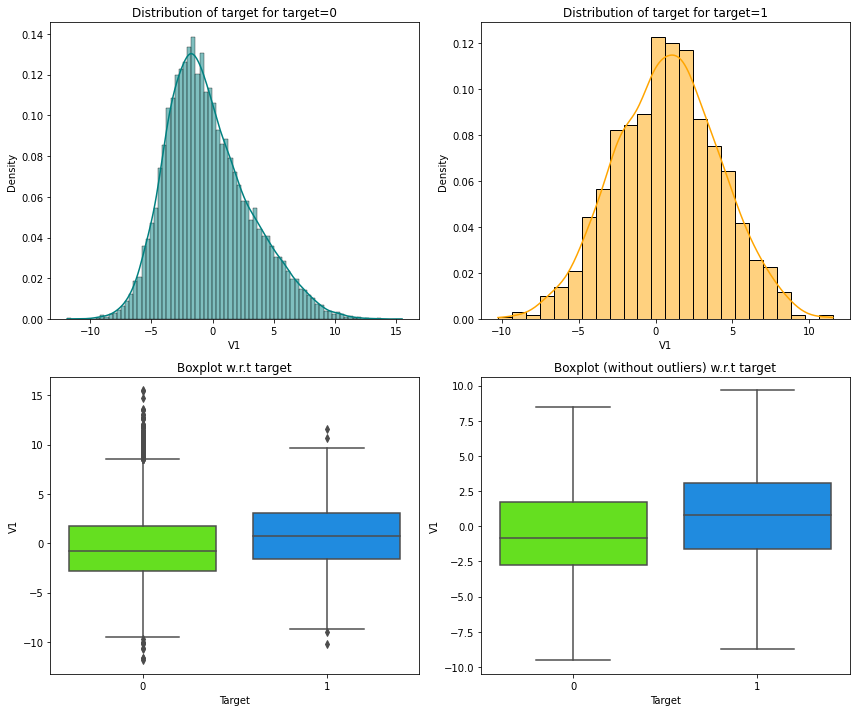

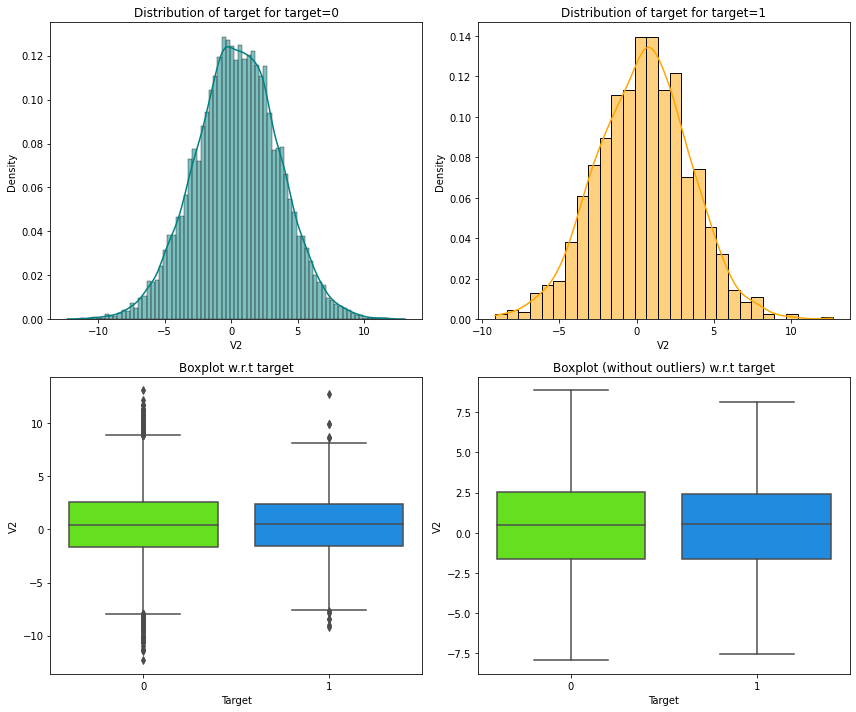

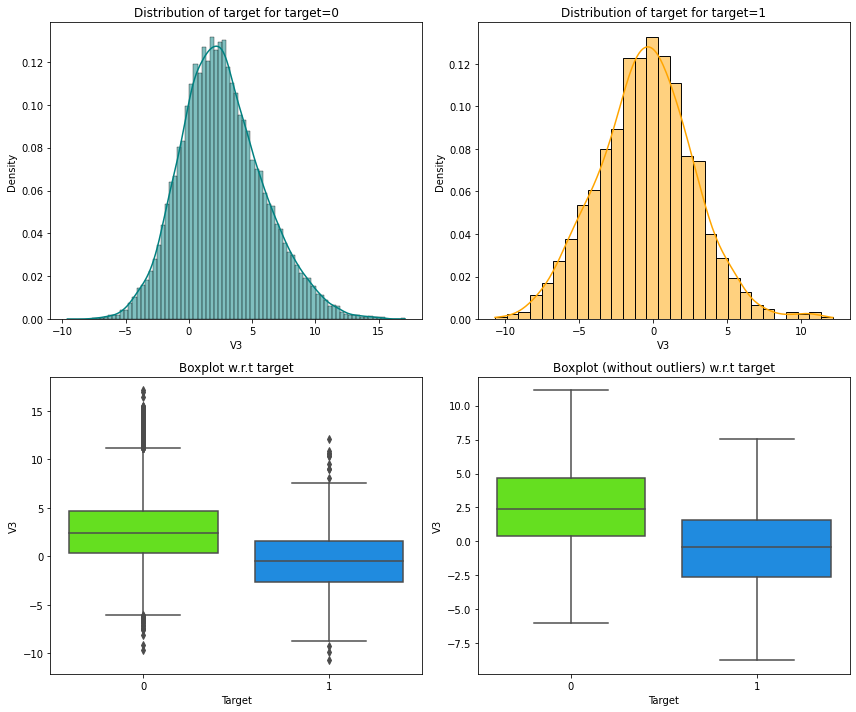

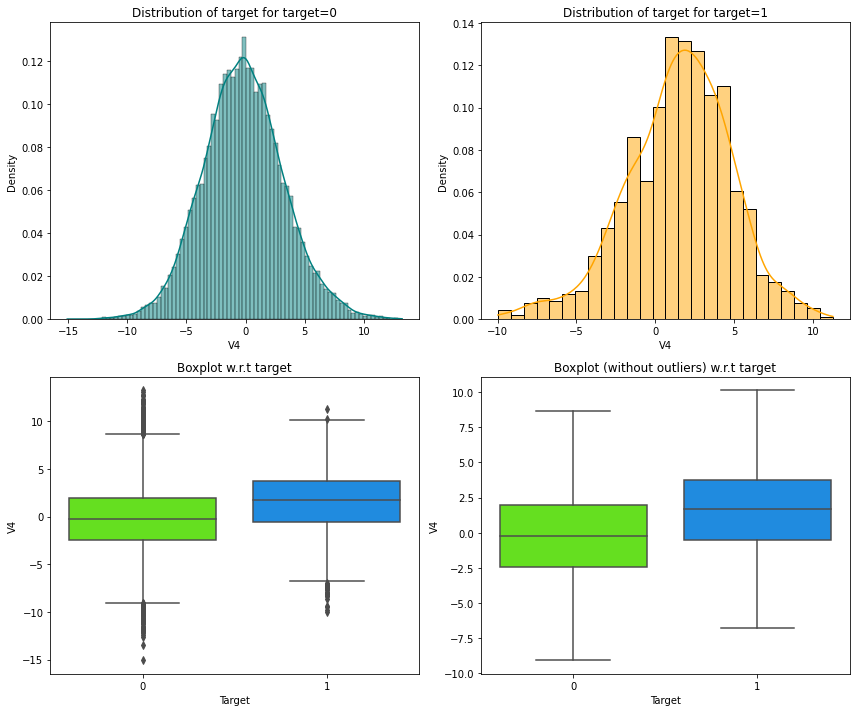

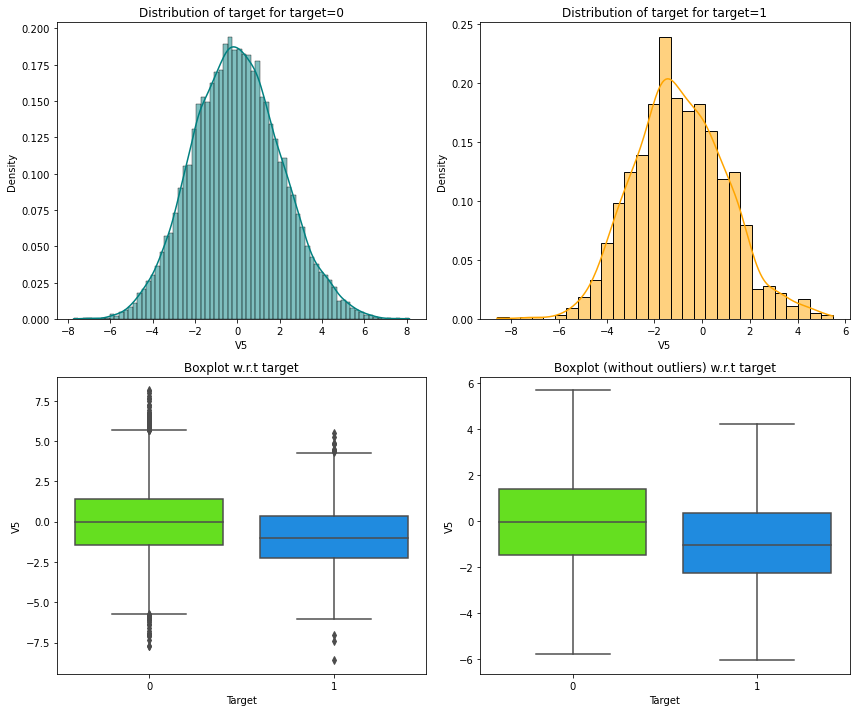

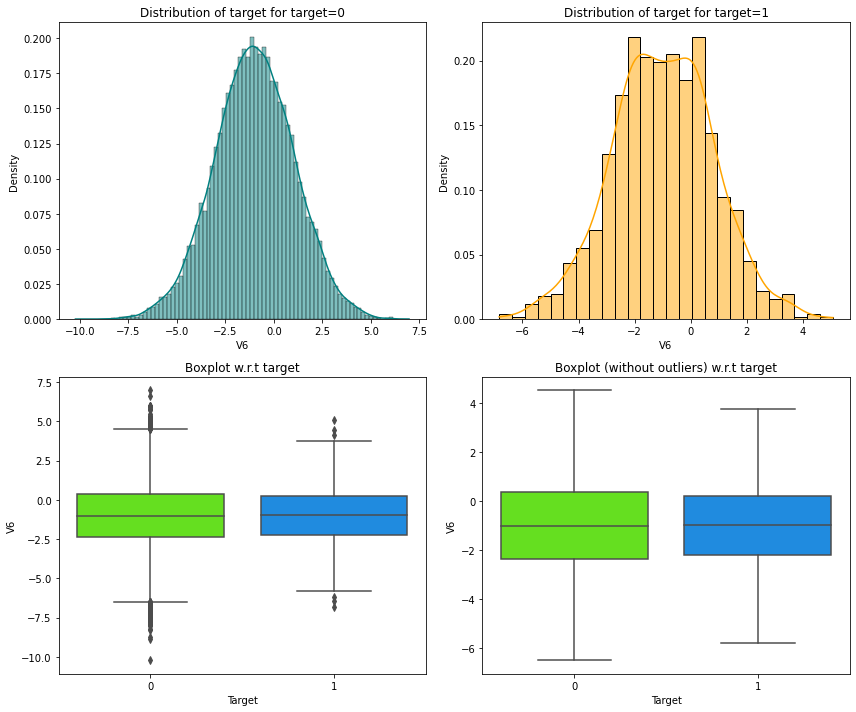

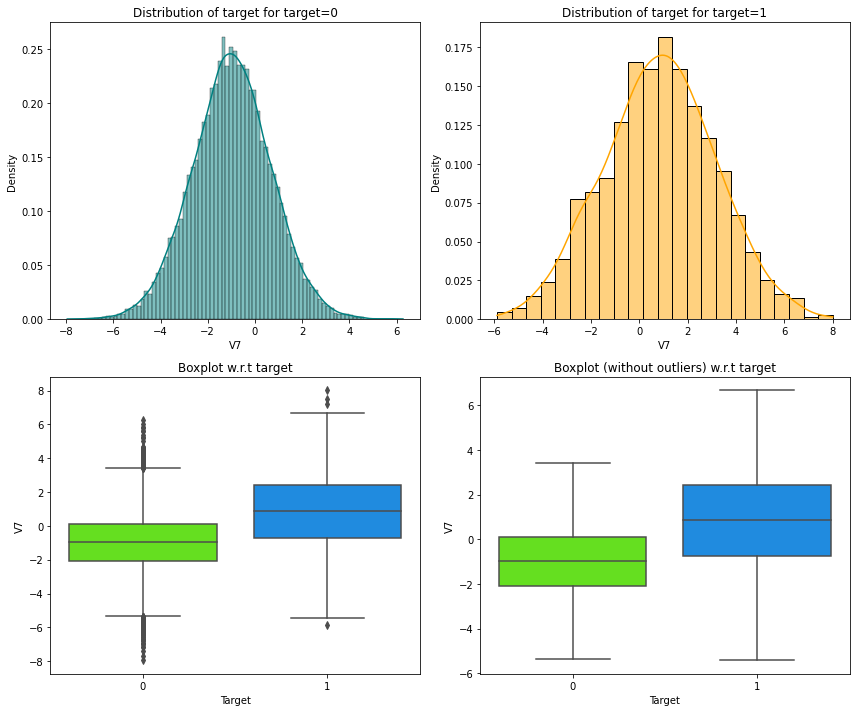

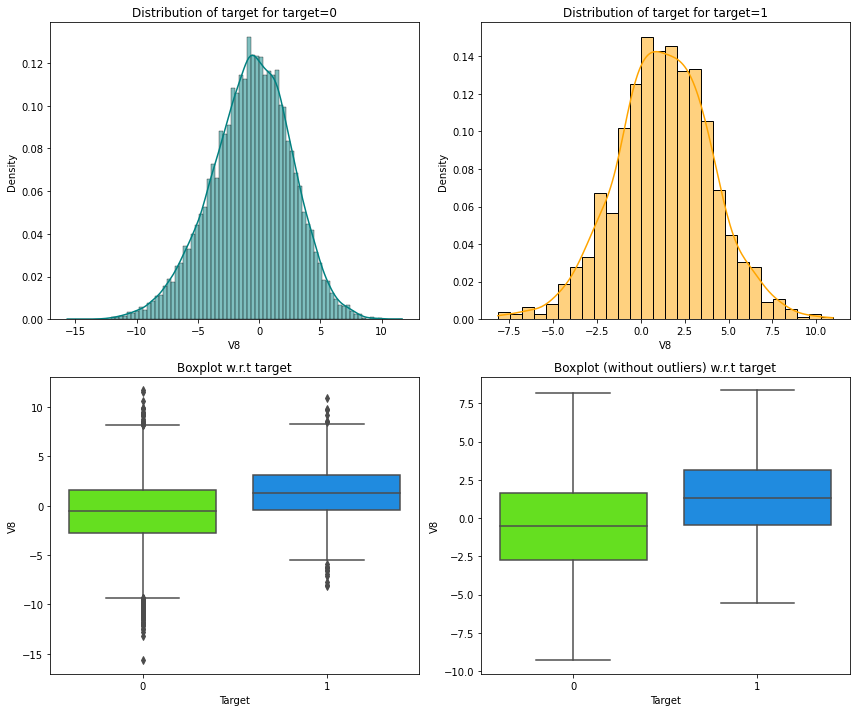

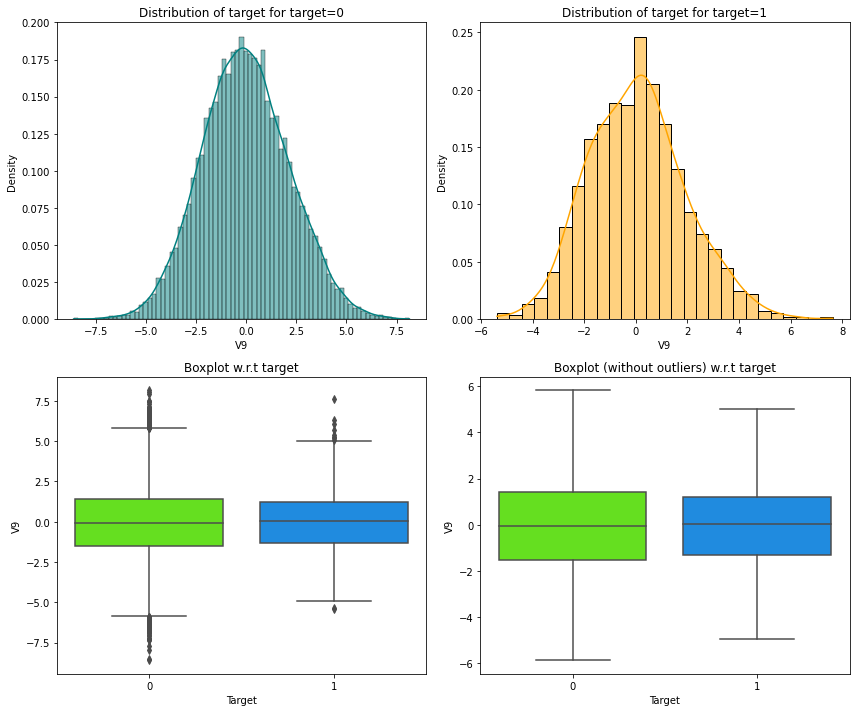

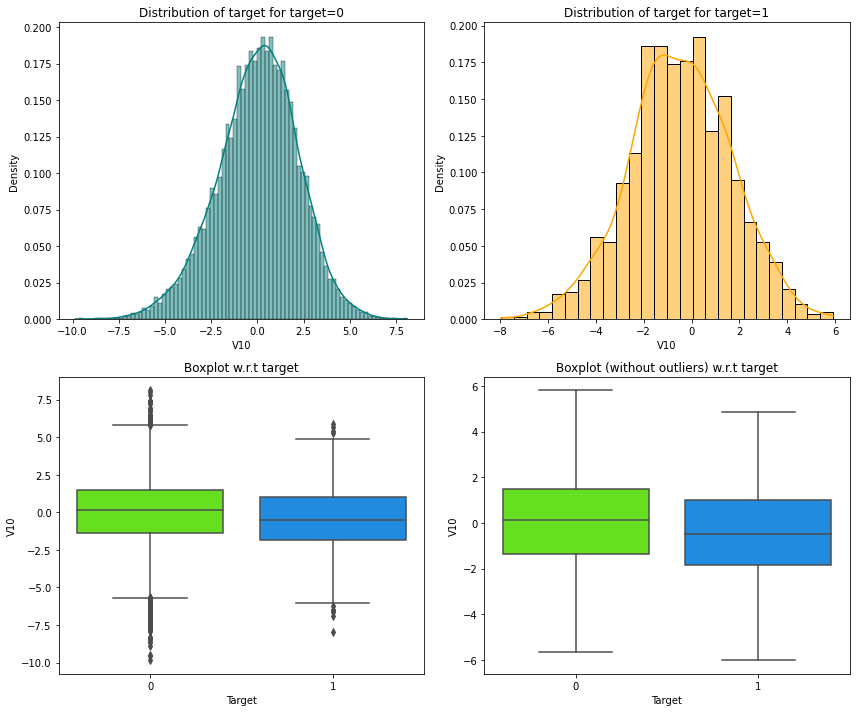

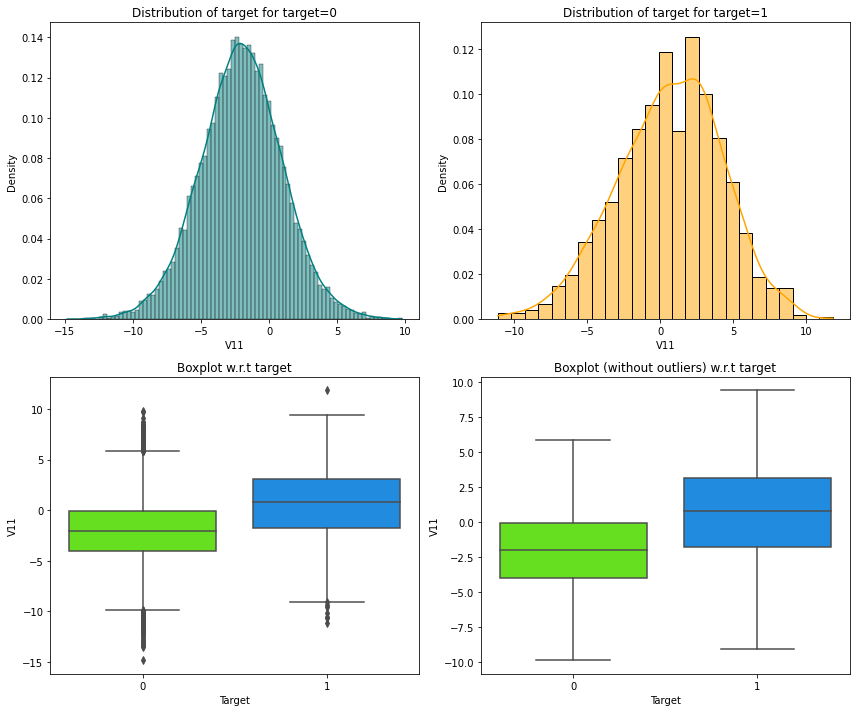

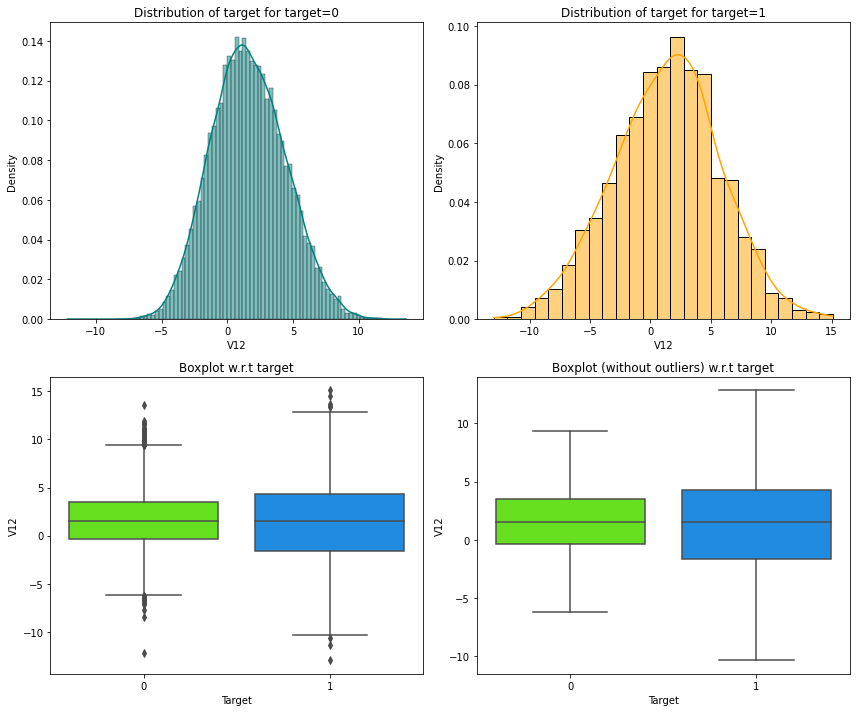

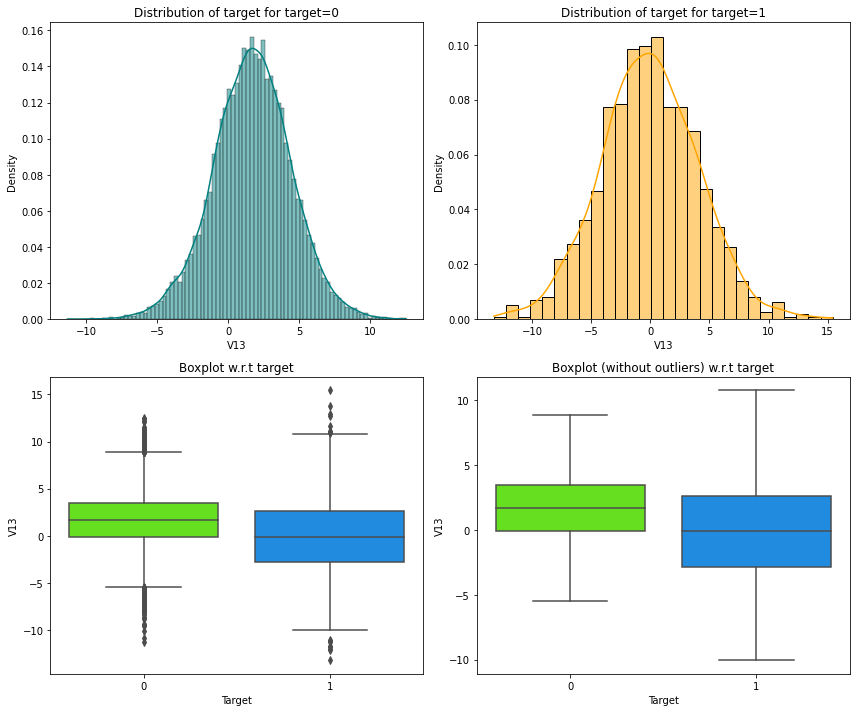

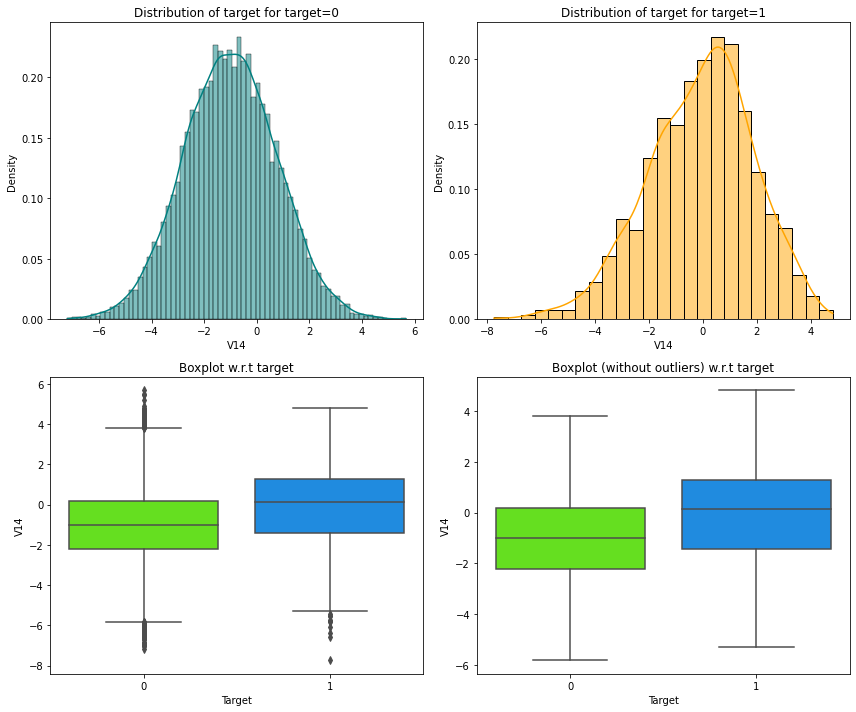

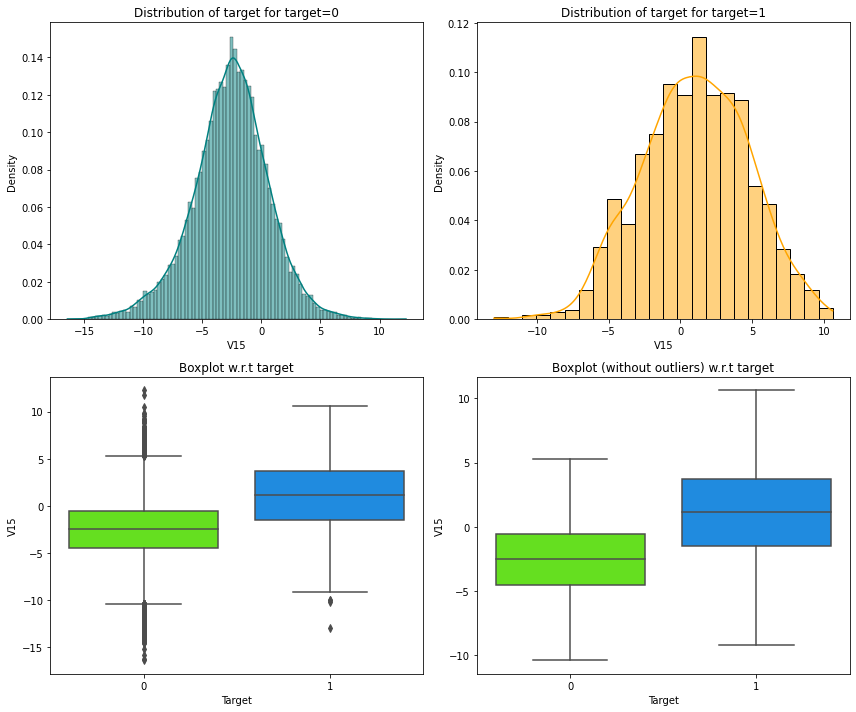

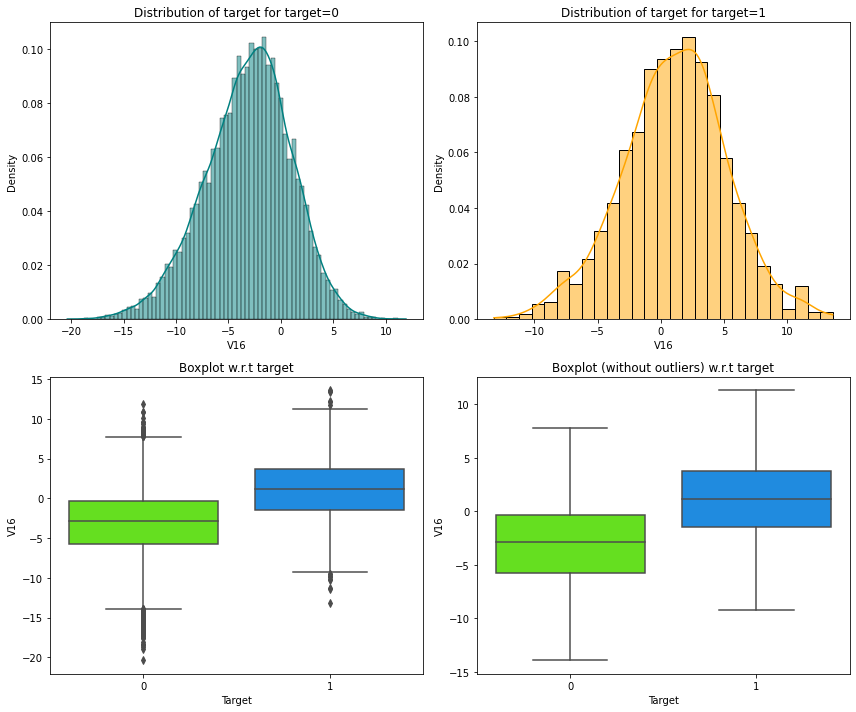

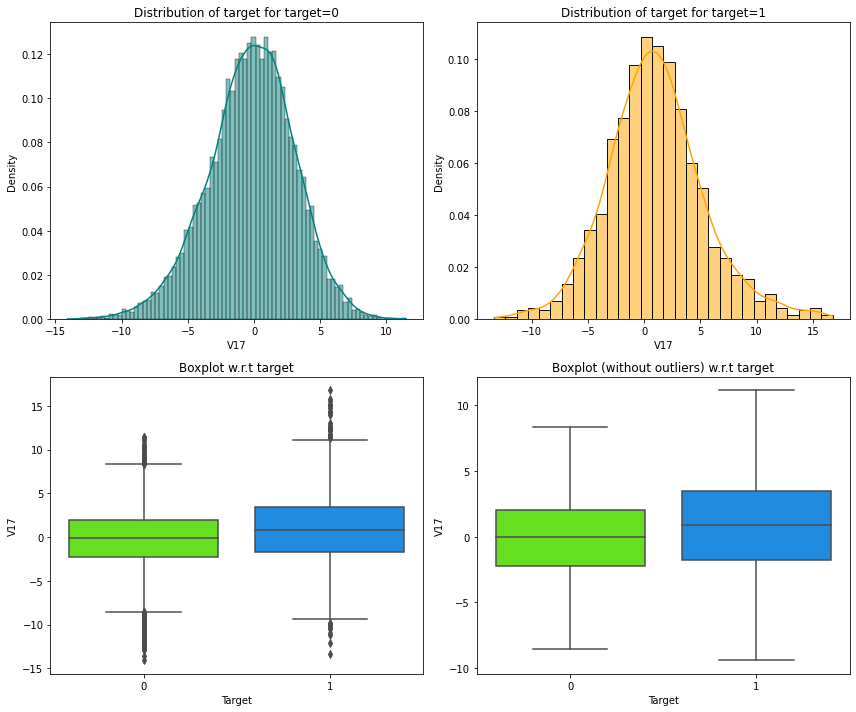

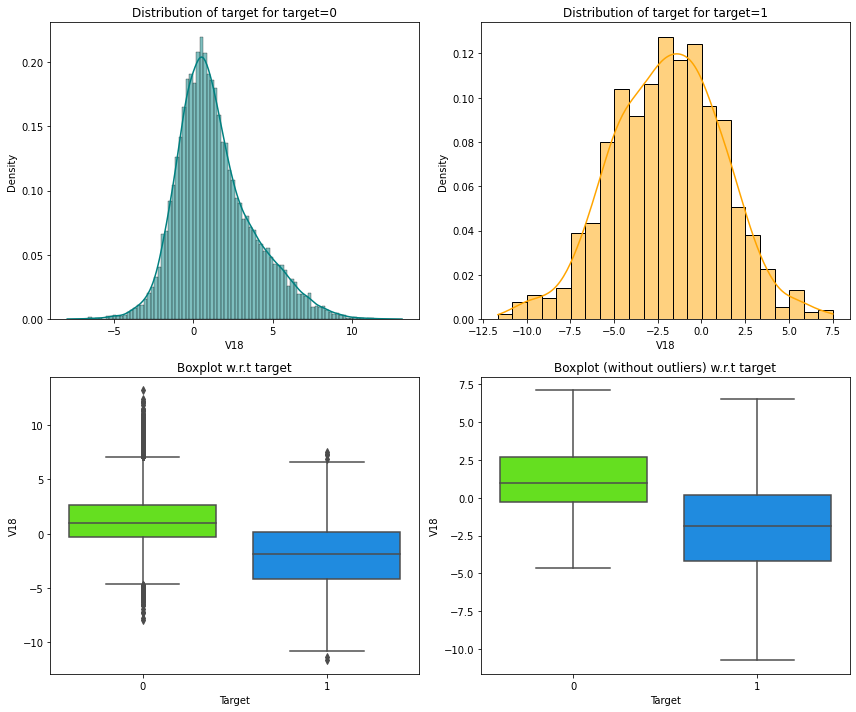

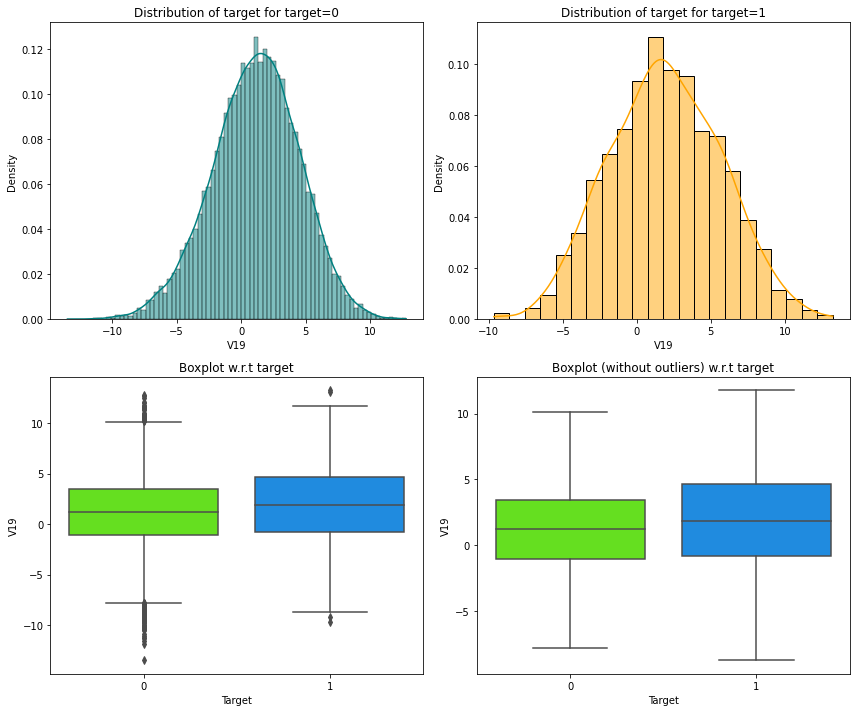

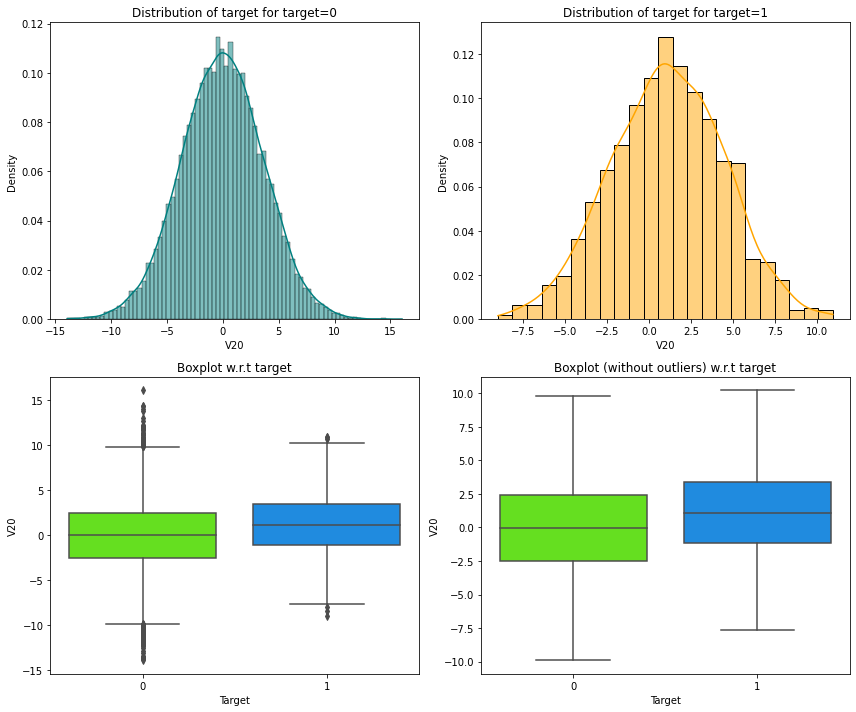

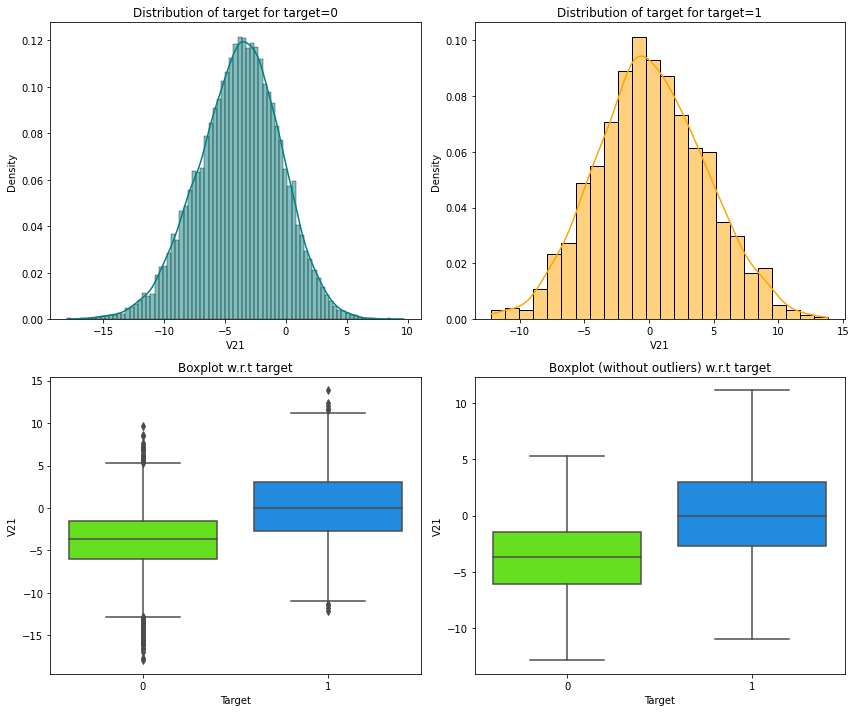

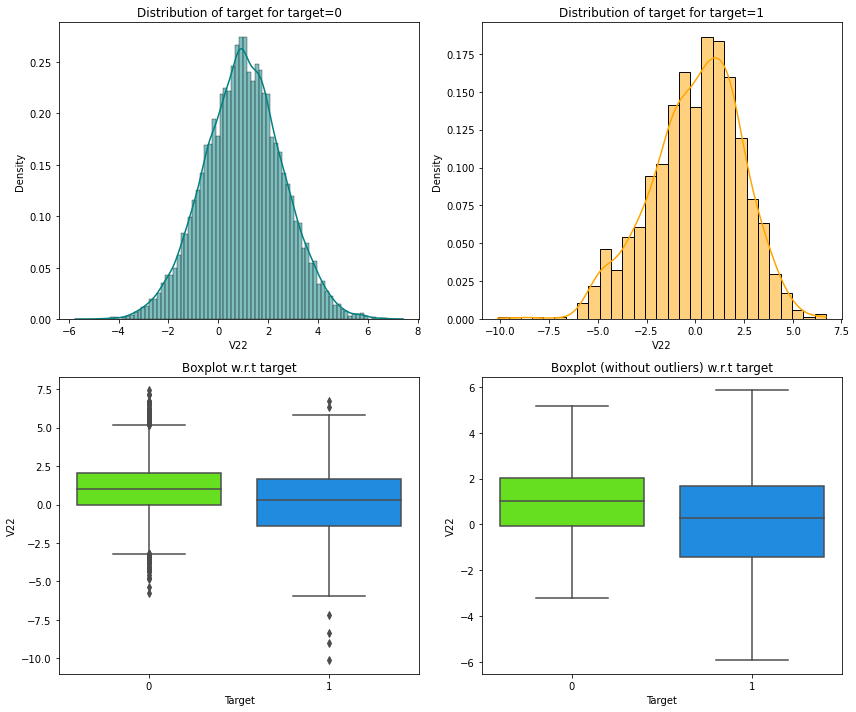

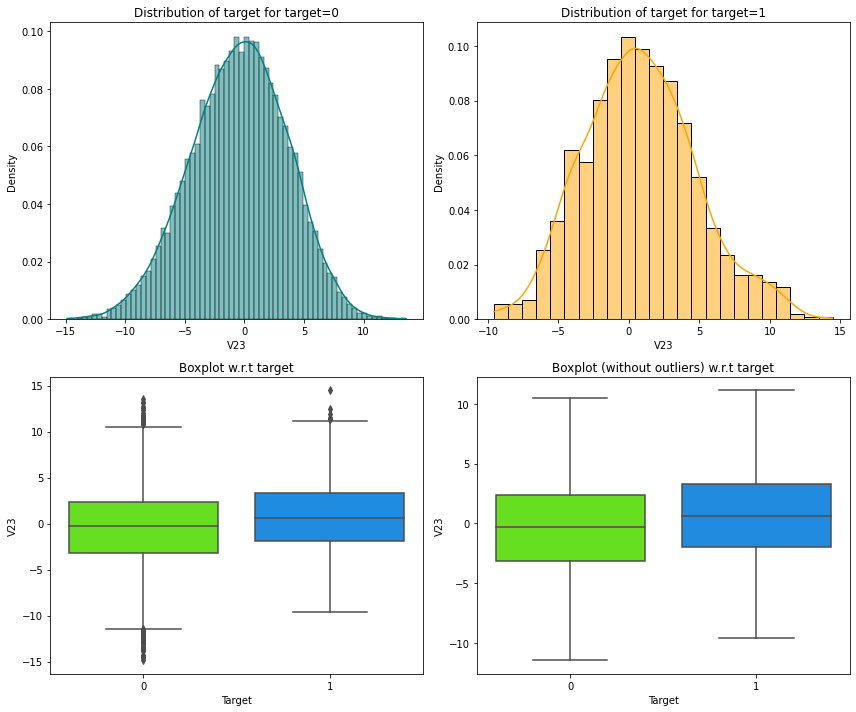

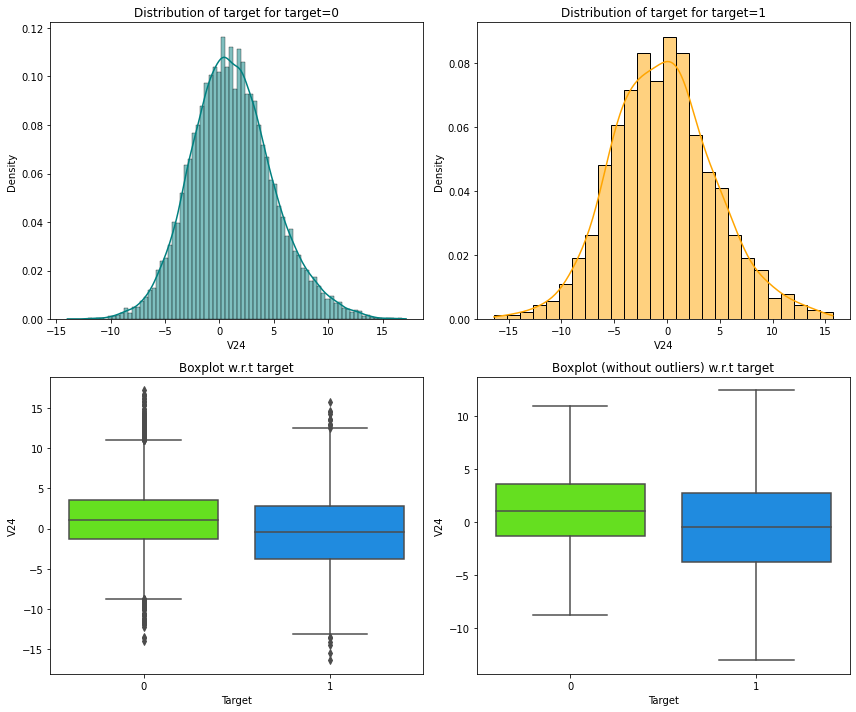

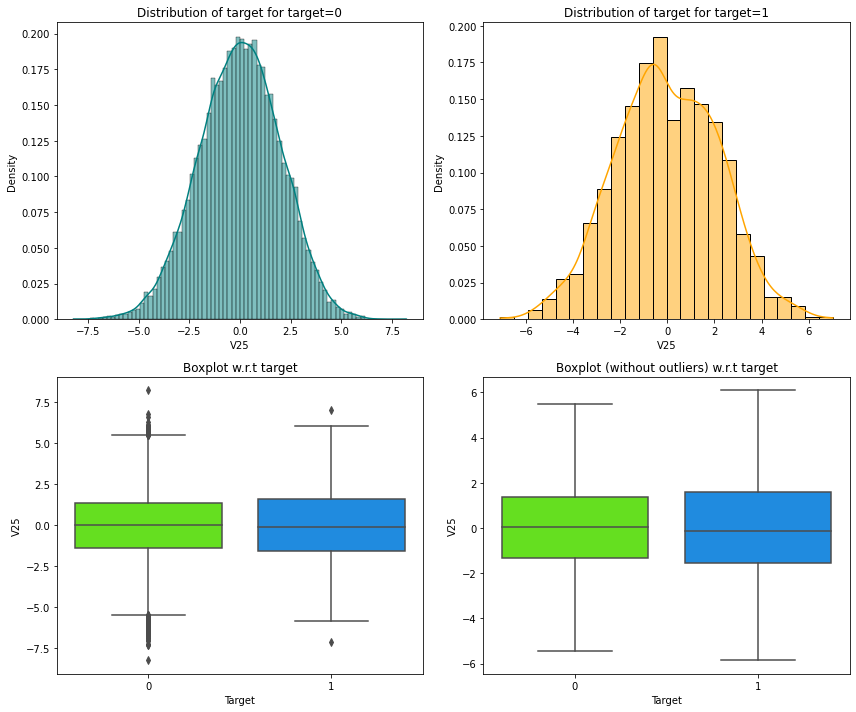

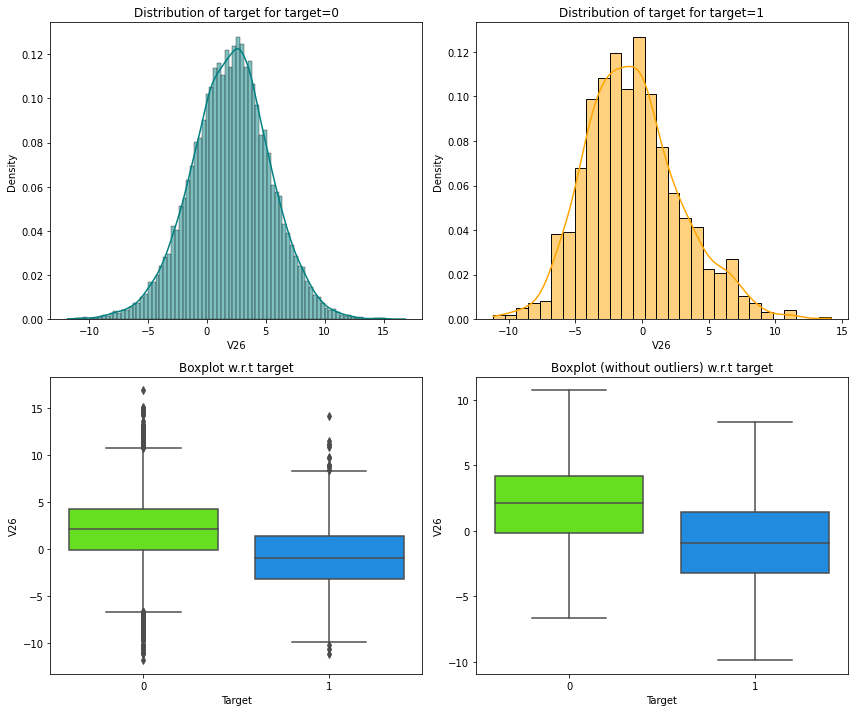

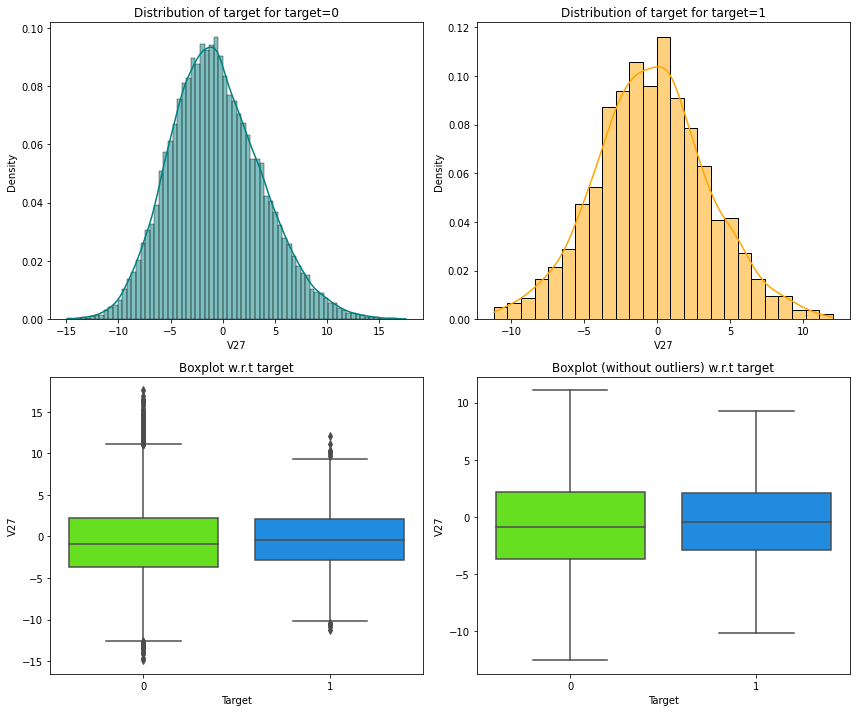

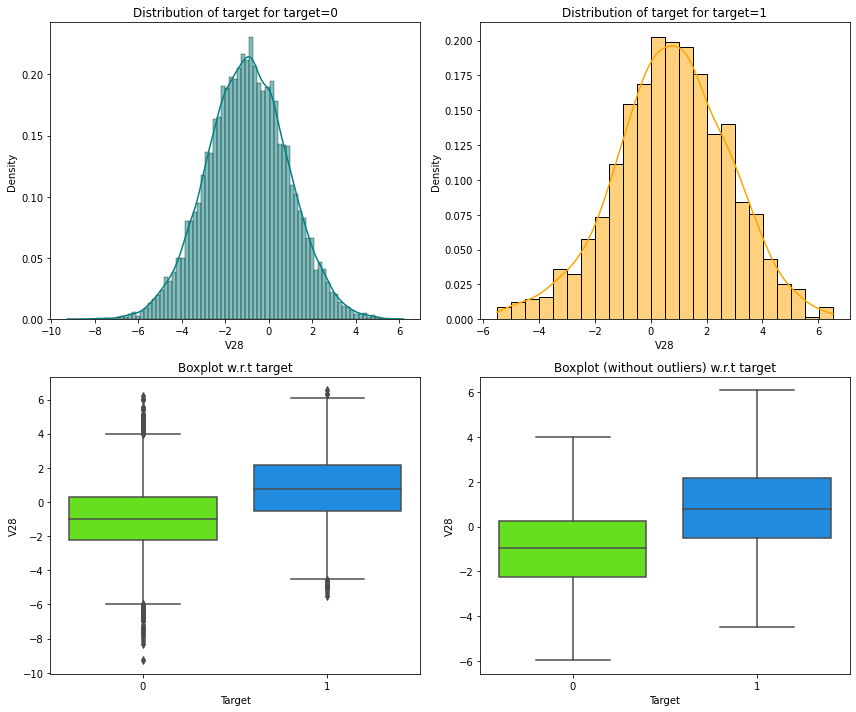

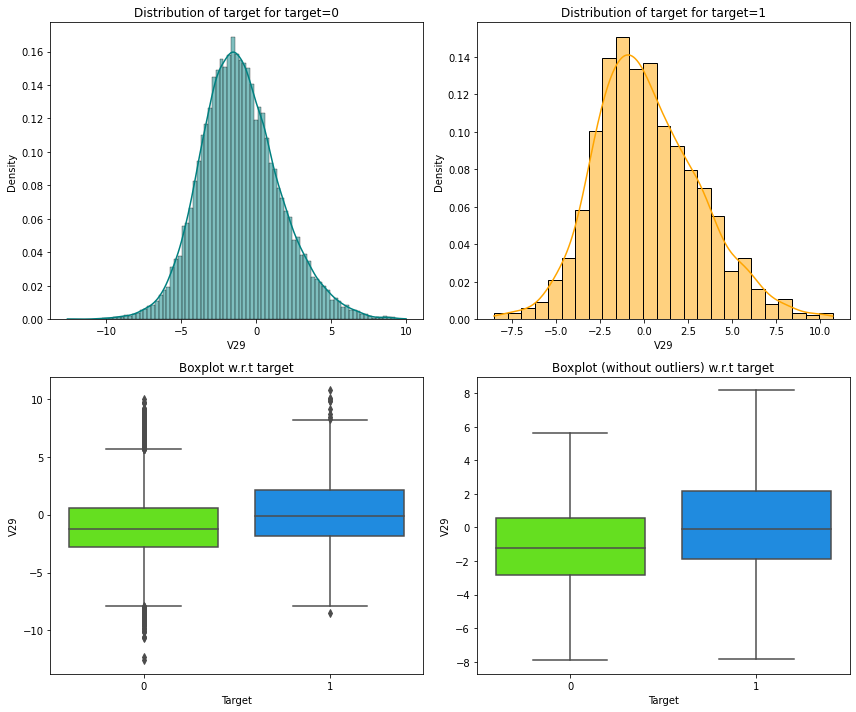

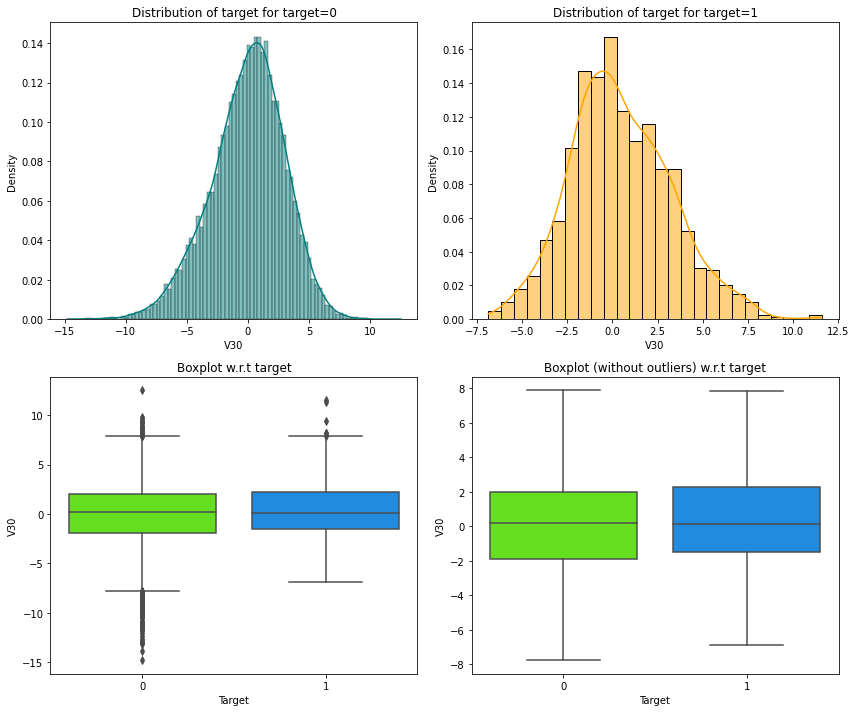

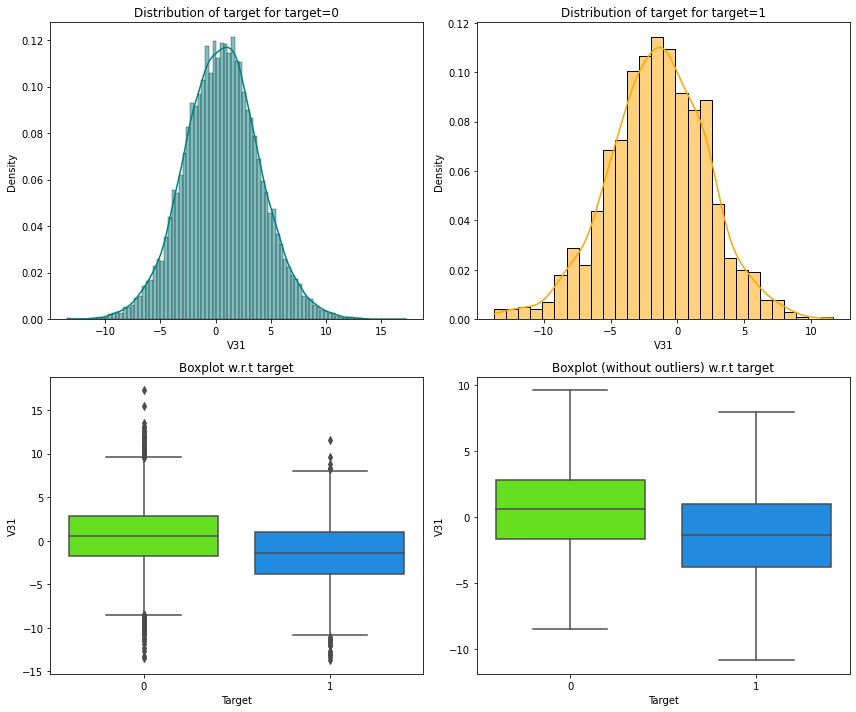

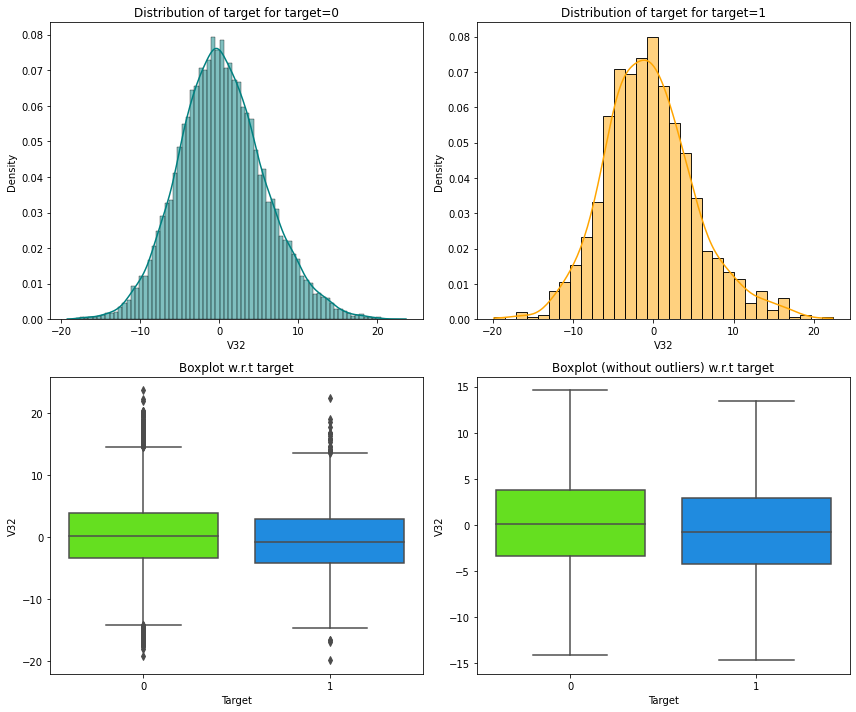

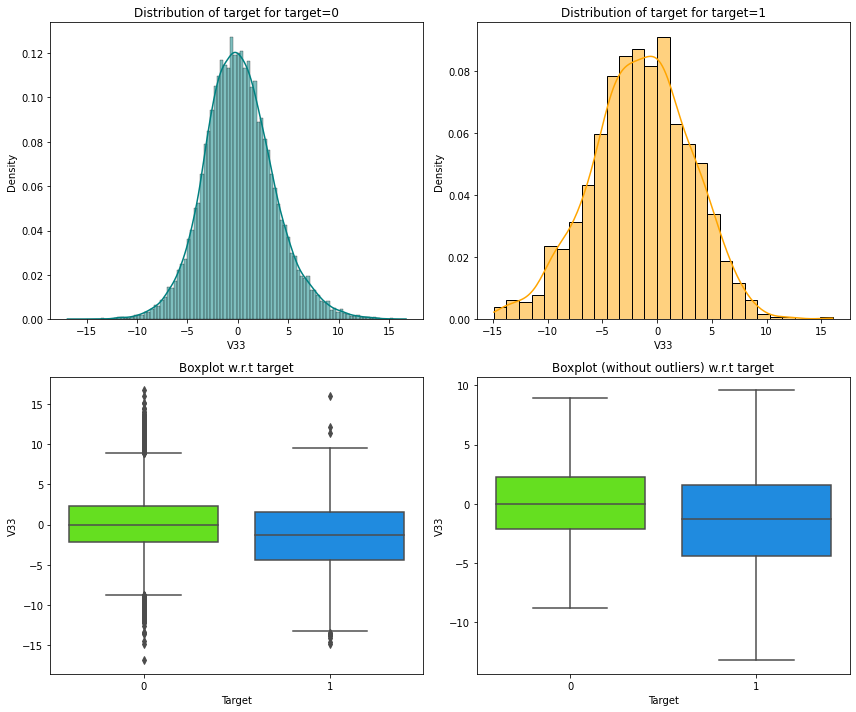

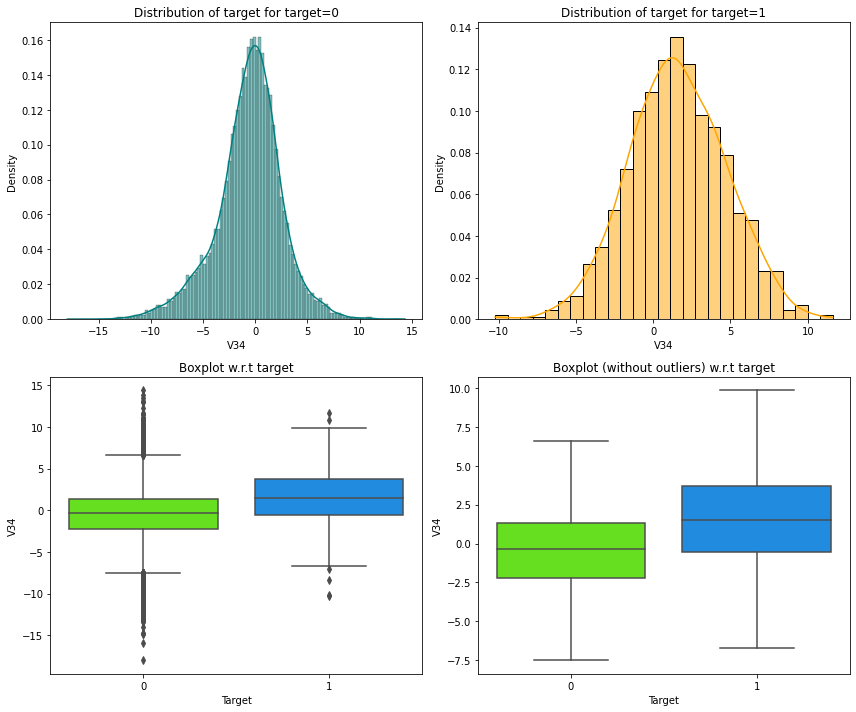

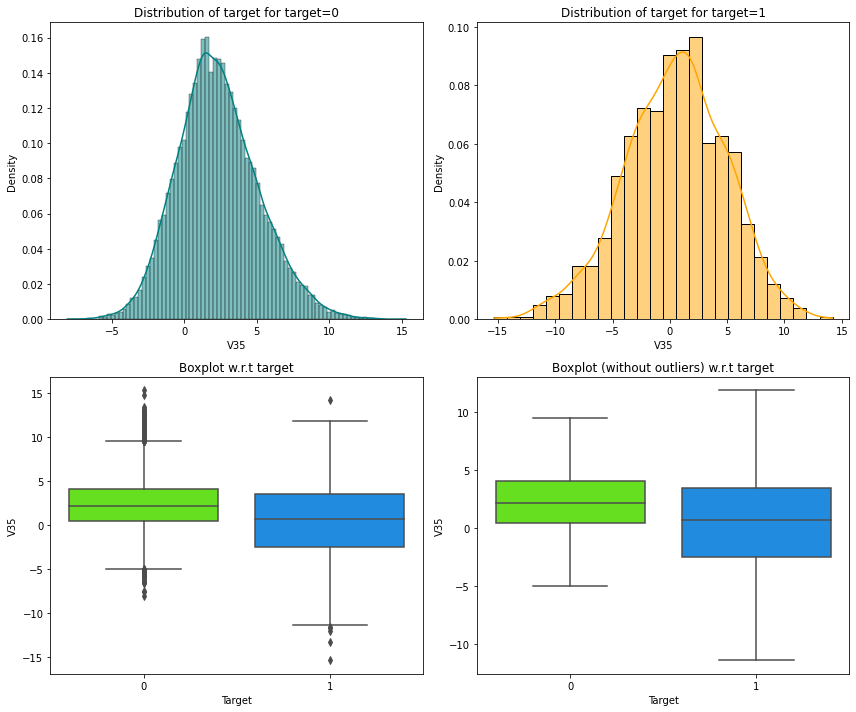

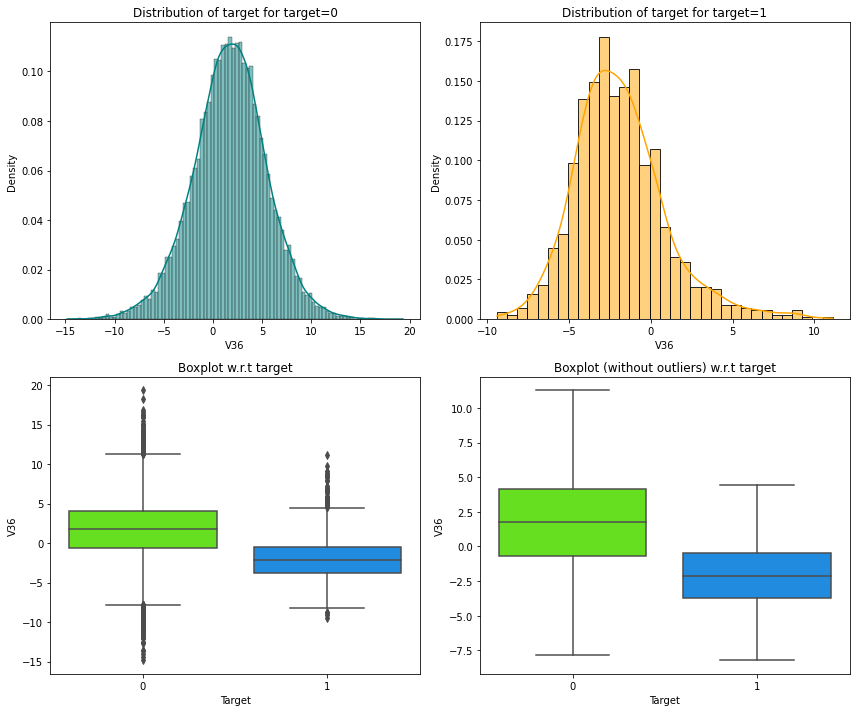

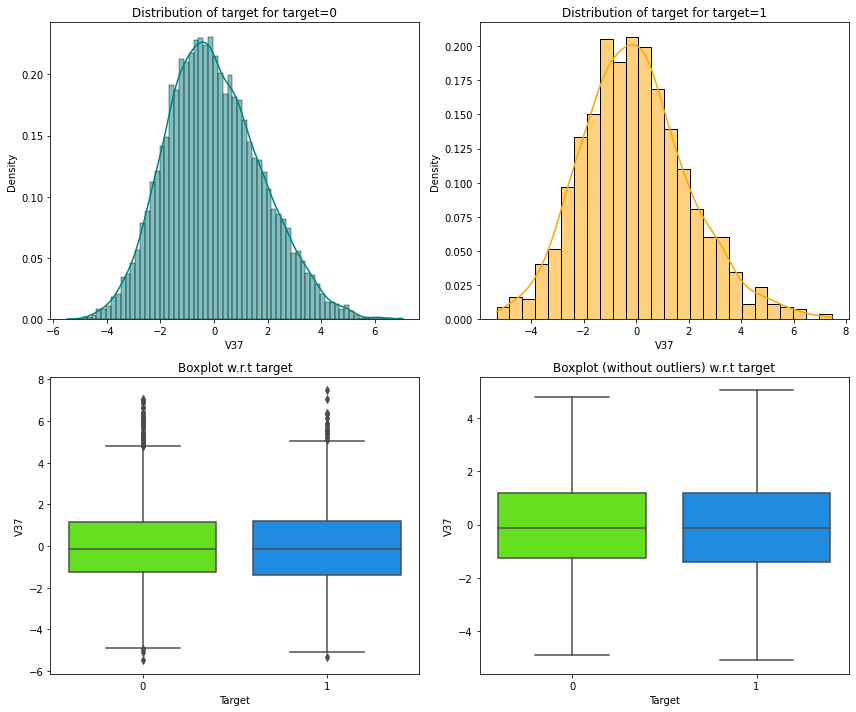

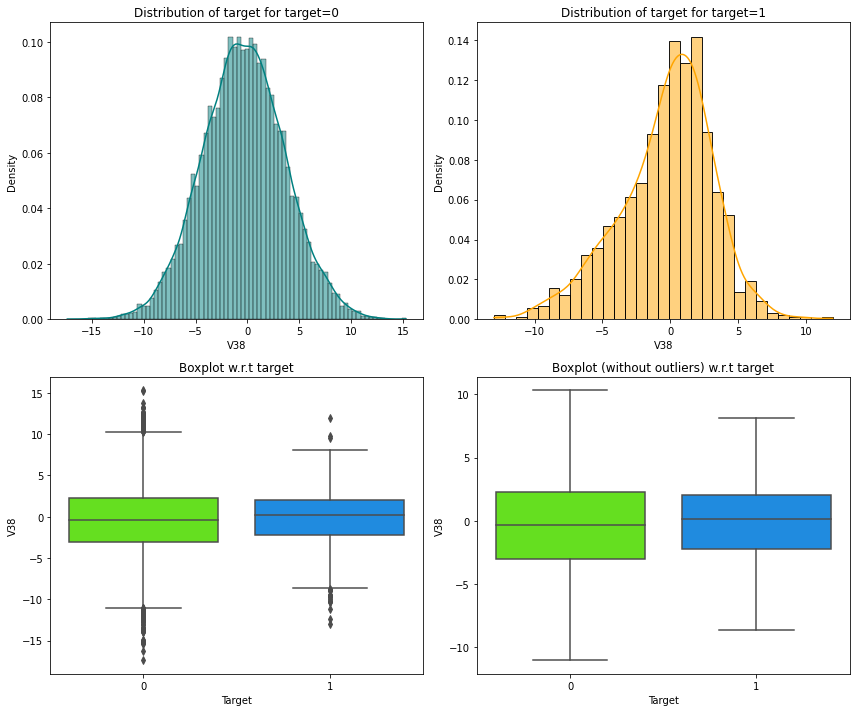

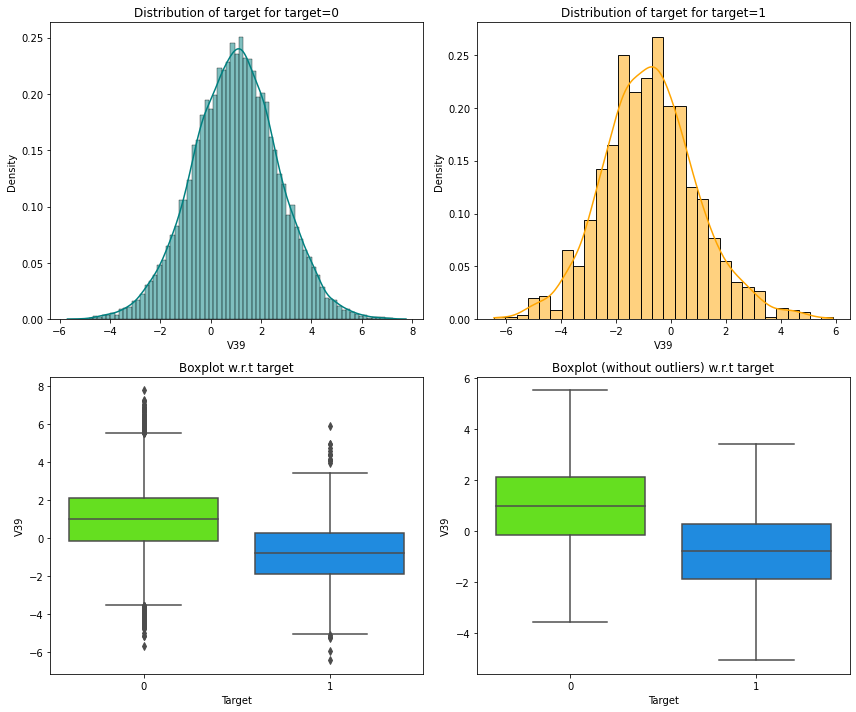

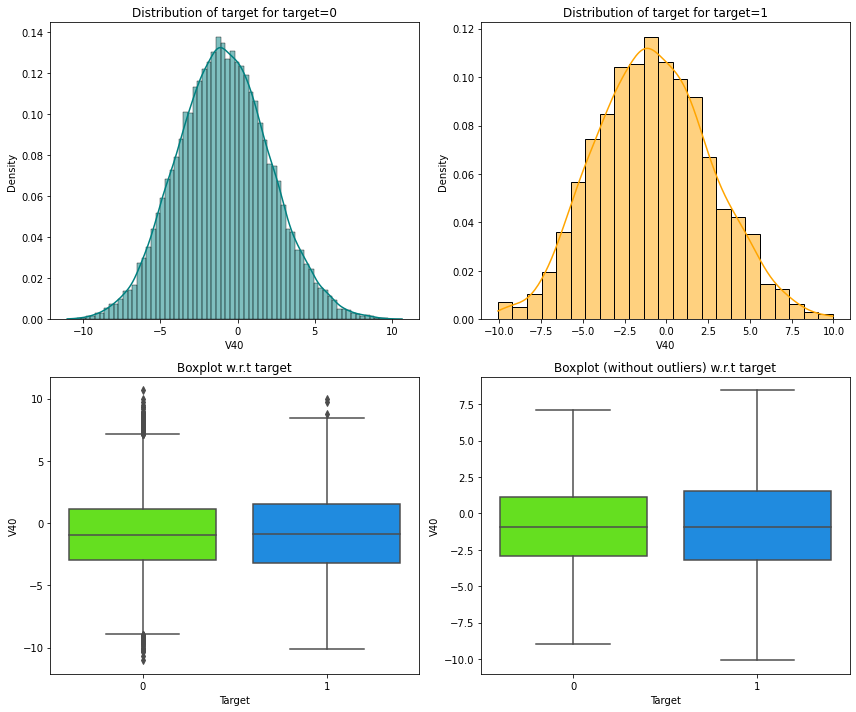

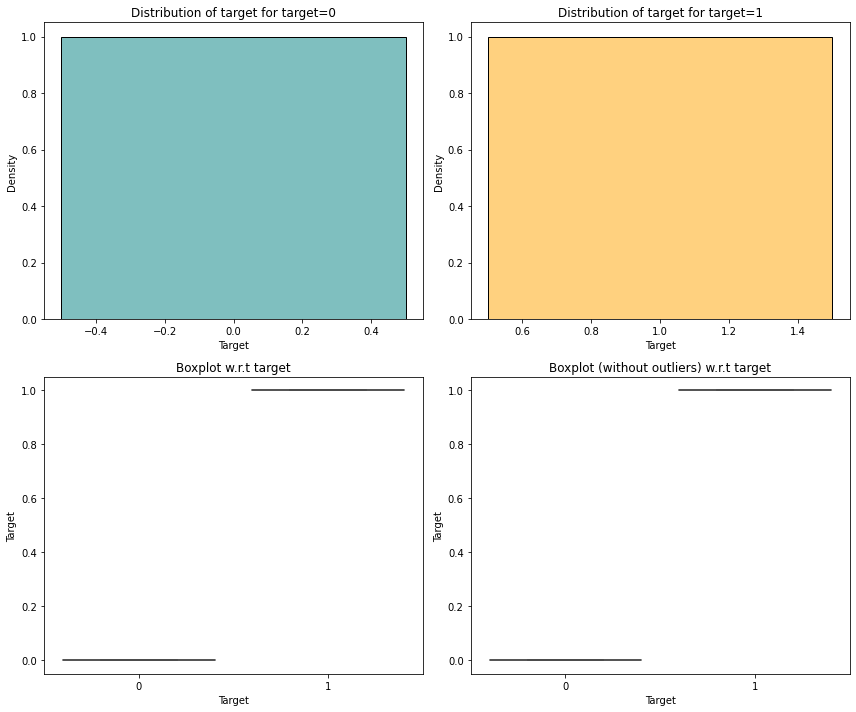

In [ ]:
for feature in df.columns:
  distribution_plot_wrt_target(df, feature, 'Target')


Obsrvation:

* It can be observed tha V39's median of machine failure is less than V39's median of machine no failure . This indicates that as V39 decreases, the propability of machine failure increases.

* It can be observed tha V38's median of machine failure is greater than V38's median of machine no failure . This indicates that as V38 increases, the propability of machine failure increases too.

* It can be observed tha V36's median of machine failure is less than V36's median of machine no failure . This indicates that as V36 decreases, the propability of machine failure increases.

* It can be observed tha V35's median of machine failure is less than V35's median of machine no failure . This indicates that as V35 decreases, the propability of machine failure increases.

* It can be observed tha V34's median of machine failure is greater than V34's median of machine no failure . This indicates that as V34 increases, the propability of machine failure increases too.

* It can be observed tha V33's median of machine failure is less than V33's median of machine no failure . This indicates that as V33 decreases, the propability of machine failure increases.

* It can be observed tha V32's median of machine failure is less than V32's median of machine no failure . This indicates that as V32 decreases, the propability of machine failure increases.

* It can be observed tha V31's median of machine failure is less than V31's median of machine no failure . This indicates that as V31 decreases, the propability of machine failure increases.

* It can be observed tha V29's median of machine failure is greater than V29's median of machine no failure . This indicates that as V29 increases, the propability of machine failure increases too.

* It can be observed tha V28's median of machine failure is greater than V28's median of machine no failure . This indicates that as V28 increases, the propability of machine failure increases too.


* It can be observed tha V27's median of machine failure is greater than V27's median of machine no failure . This indicates that as V27 increases, the propability of machine failure increases too.

* It can be observed tha V26's median of machine failure is less than V26's median of machine no failure . This indicates that as V26 decreases, the propability of machine failure increases.

* It can be observed tha V24's median of machine failure is less than V24's median of machine no failure . This indicates that as V24 decreases, the propability of machine failure increases.

* It can be observed tha V23's median of machine failure is greater than V23's median of machine no failure . This indicates that as V23 increases, the propability of machine failure increases too.

* It can be observed tha V22's median of machine failure is less than V22's median of machine no failure . This indicates that as V22 decreases, the propability of machine failure increases.

* It can be observed tha V21's median of machine failure is greater than V21's median of machine no failure . This indicates that as V21 increases, the propability of machine failure increases too.

* It can be observed tha V20's median of machine failure is greater than V20's median of machine no failure . This indicates that as V20 increases, the propability of machine failure increases too.

* It can be observed tha V19's median of machine failure is greater than V19's median of machine no failure . This indicates that as V19 increases, the propability of machine failure increases too.

* It can be observed tha V18's median of machine failure is less than V18's median of machine no failure . This indicates that as V18 decreases, the propability of machine failure increases.

* It can be observed tha V17's median of machine failure is greater than V17's median of machine no failure . This indicates that as V17 increases, the propability of machine failure increases too.


* It can be observed tha V16's median of machine failure is greater than V16's median of machine no failure . This indicates that as V16 increases, the propability of machine failure increases too.

* It can be observed tha V15's median of machine failure is greater than V15's median of machine no failure . This indicates that as V15 increases, the propability of machine failure increases too.

* It can be observed tha V14's median of machine failure is greater than V14's median of machine no failure . This indicates that as V14 increases, the propability of machine failure increases too.

* It can be observed tha V13's median of machine failure is less than V13's median of machine no failure . This indicates that as V13 decreases, the propability of machine failure increases.

* It can be observed tha V11's median of machine failure is greater than V11's median of machine no failure . This indicates that as V11 increases, the propability of machine failure increases too.


* It can be observed tha V10's median of machine failure is less than V10's median of machine no failure . This indicates that as V10 decreases, the propability of machine failure increases.

* It can be observed tha V8's median of machine failure is greater than V8's median of machine no failure . This indicates that as V8 increases, the propability of machine failure increases too.

* It can be observed tha V7's median of machine failure is greater than V7's median of machine no failure . This indicates that as V7 increases, the propability of machine failure increases too.

* It can be observed tha V5's median of machine failure is less than V5's median of machine no failure . This indicates that as V5 decreases, the propability of machine failure increases.

* It can be observed tha V4's median of machine failure is greater than V4's median of machine no failure . This indicates that as V4 increases, the propability of machine failure increases too.

* It can be observed tha V3's median of machine failure is less than V3's median of machine no failure . This indicates that as V3 decreases, the propability of machine failure increases

* It can be observed tha V1's median of machine failure is greater than V1's median of machine no failure . This indicates that as V1 increases, the propability of machine failure increases too.

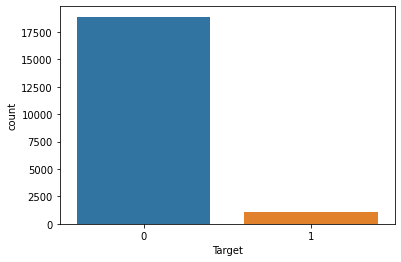

In [ ]:
sns.countplot(data=df,x='Target')

Observation :

* It can be observed that our target variable is imbalanced

## Data Pre-processing

In [ ]:
df1=df.copy()

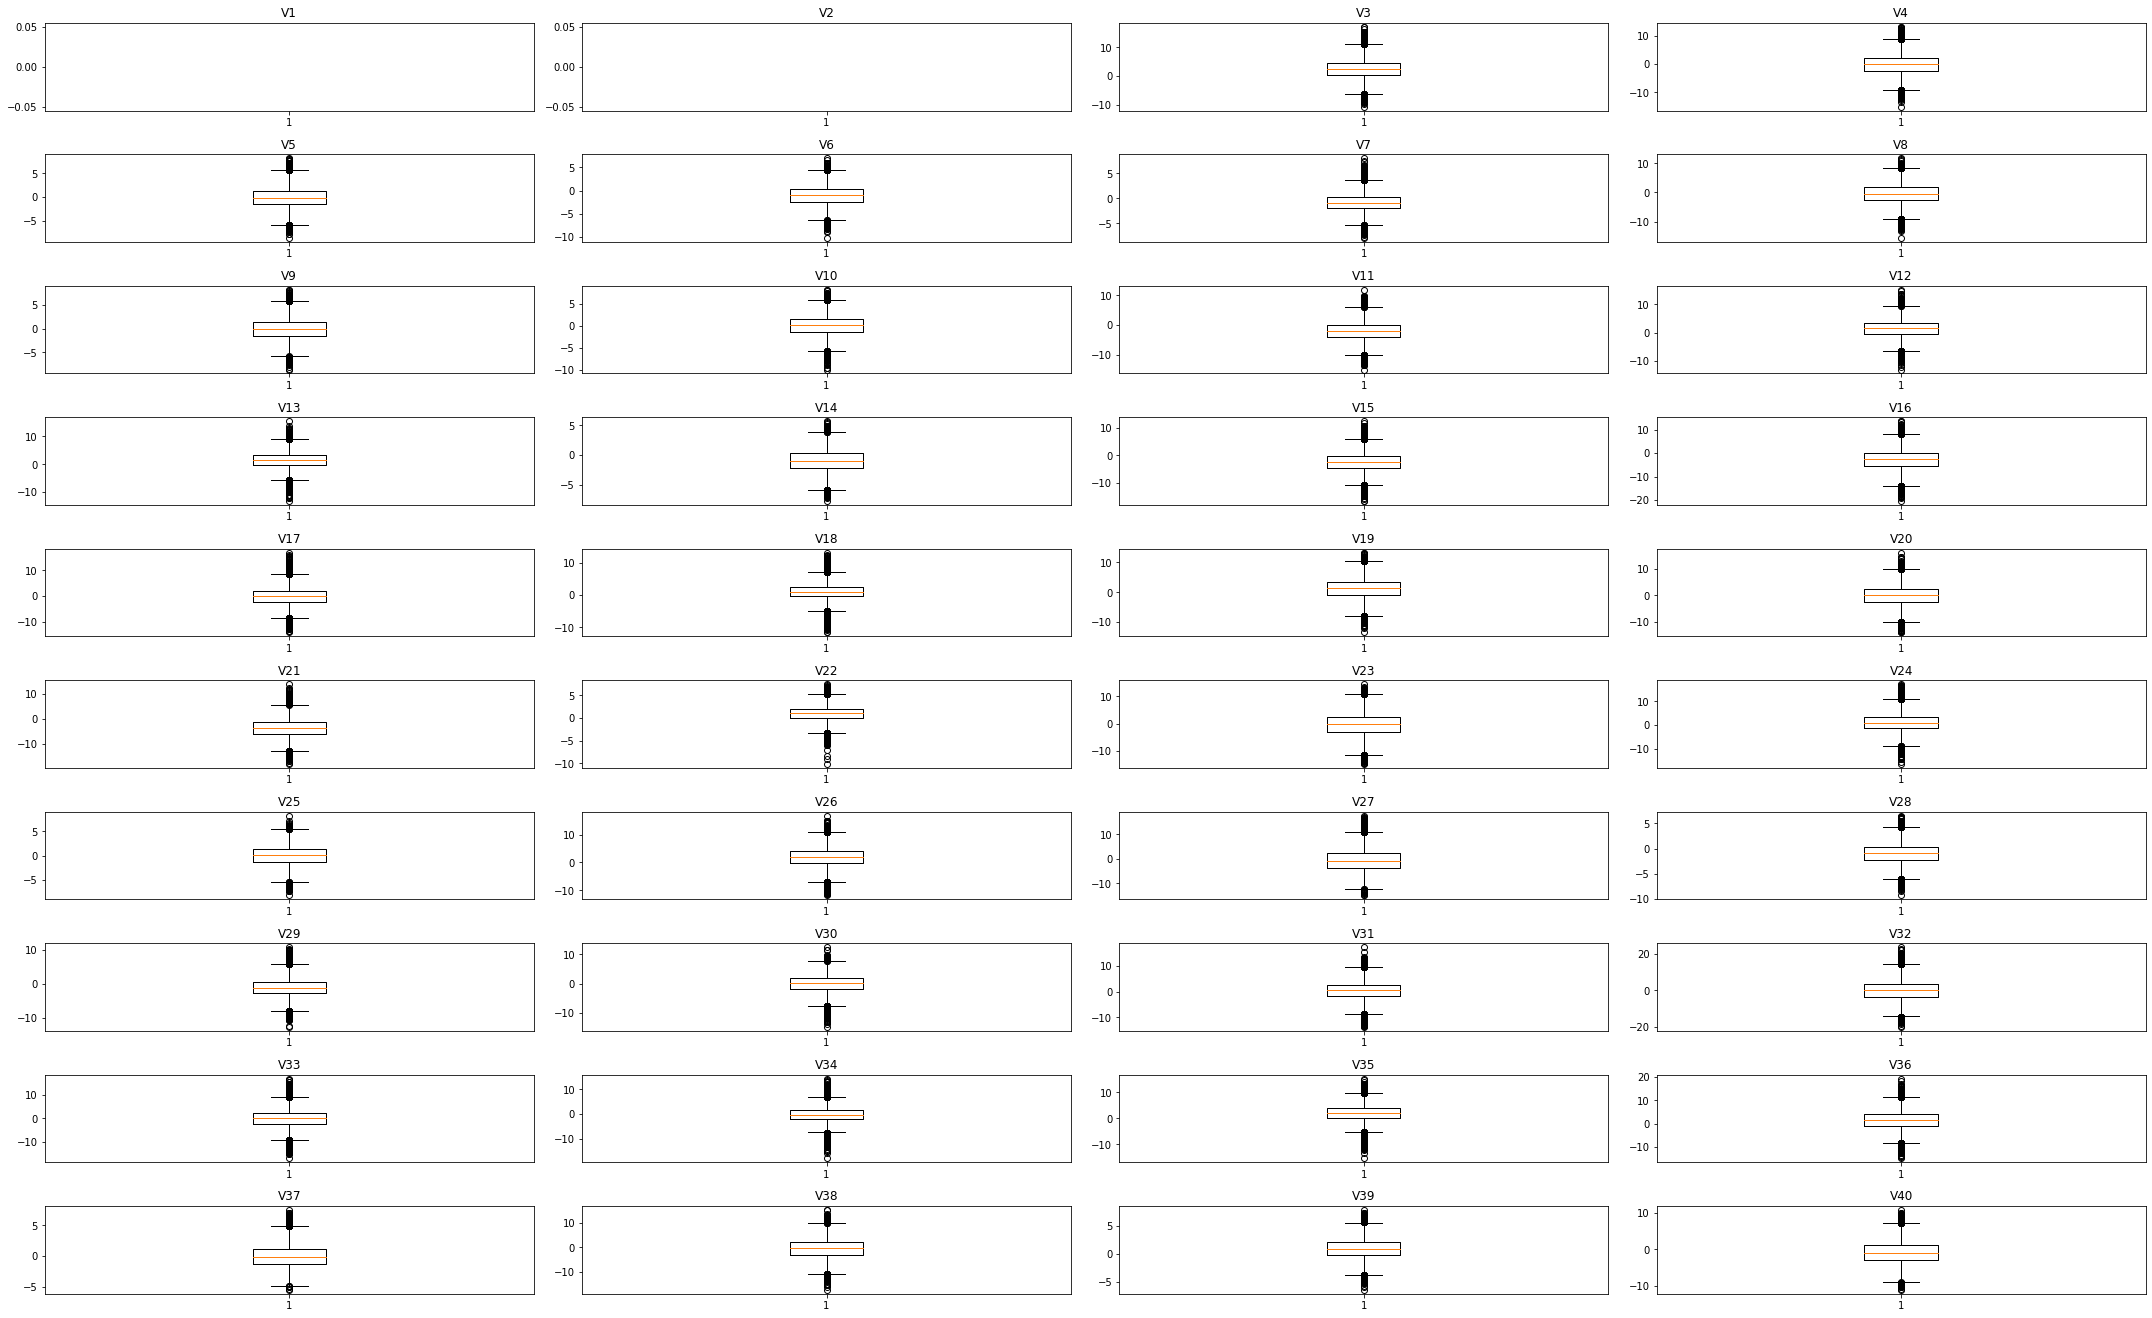

In [ ]:
# outlier detection using boxplot
numerical_col = df1.select_dtypes(include=np.number).columns.tolist()
numerical_col.remove('Target')
plt.figure(figsize=(30, 20))


for i, variable in enumerate(numerical_col):
    plt.subplot(11, 4, i + 1)
    plt.boxplot(df1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Let's find the percentage of outliers, in each column of the data, using IQR.**

In [ ]:
# to find the 25th percentile and 75th percentile for the numerical columns.
Q1 = df1[numerical_col].quantile(0.25)
Q3 = df1[numerical_col].quantile(0.75)

IQR = Q3 - Q1                   #Inter Quantile Range (75th percentile - 25th percentile)

lower_whisker = Q1 - 1.5*IQR    #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper_whisker = Q3 + 1.5*IQR

In [ ]:
# Percentage of outliers in each column
((df1[numerical_col] < lower_whisker) | (df1[numerical_col] > upper_whisker)).sum()/df1.shape[0]*100

V1    1.070
V2    0.910
V3    1.375
V4    1.140
V5    0.565
V6    0.775
V7    1.455
V8    0.955
V9    0.740
V10   1.070
V11   1.290
V12   0.740
V13   1.515
V14   0.640
V15   2.565
V16   1.150
V17   1.480
V18   3.655
V19   0.745
V20   0.765
V21   1.245
V22   1.225
V23   0.470
V24   1.535
V25   0.570
V26   1.210
V27   0.890
V28   0.905
V29   1.680
V30   1.230
V31   1.145
V32   1.160
V33   1.915
V34   4.015
V35   1.575
V36   1.305
V37   0.700
V38   0.825
V39   0.975
V40   0.685
dtype: float64

Observation: 

* We will not treat outliers

In [ ]:
# Dividing train data into X and y 
X=df1.drop('Target',axis=1)
y=df1['Target']

In [ ]:
# Splitting data into training and test set:
X_train, X_val, y_train, y_val = train_test_split(X, y,
        test_size=0.2, random_state=1, stratify=y)
print (X_train.shape, X_val.shape)

(16000, 40) (4000, 40)


In [ ]:
# Dividing test data into X_test and y_test

X_test = df_test.drop('Target',axis=1)
y_test = df_test['Target']

In [ ]:
# Checking the number of rows and columns in the X_test data
X_test.shape

(5000, 40)

## Missing value imputation




In [ ]:
# creating an instace of the imputer to be used
#imputer = SimpleImputer(strategy="median")
imputer = KNNImputer(n_neighbors=10)

In [ ]:
%%time

# Fit and transform the train data

X_train[['V1', 'V2']] = imputer.fit_transform(X_train[['V1', 'V2']])

# Transform the validation data

X_val[['V1', 'V2']] = imputer.fit_transform(X_val[['V1', 'V2']])

# Transform the test data

X_test[['V1', 'V2']] = imputer.fit_transform(X_test[['V1', 'V2']])


CPU times: user 52 ms, sys: 42 ms, total: 94 ms
Wall time: 52.3 ms


In [ ]:
# Checking that no column has missing values in train, validation or test sets

print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model. 
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1
            
        },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Defining scorer to be used for cross-validation and hyperparameter tuning

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [ ]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

### Model Building with original data

Diffrent models building with original data 

In [ ]:
%%time 


models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Lr", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
#models.append(("LightGBM", LGBMClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

dtree: 0.7196280073636767
Lr: 0.48988129245223133
Bagging: 0.7083222243382213
Random forest: 0.7195835713832286
GBM: 0.7173363803719928
Adaboost: 0.6215641465117756
Xgboost: 0.7443534564844791

Validation Performance:

dtree: 0.7387387387387387
Lr: 0.49099099099099097
Bagging: 0.7207207207207207
Random forest: 0.7432432432432432
GBM: 0.7432432432432432
Adaboost: 0.6576576576576577
Xgboost: 0.7567567567567568
CPU times: user 4min 53s, sys: 845 ms, total: 4min 54s
Wall time: 4min 53s


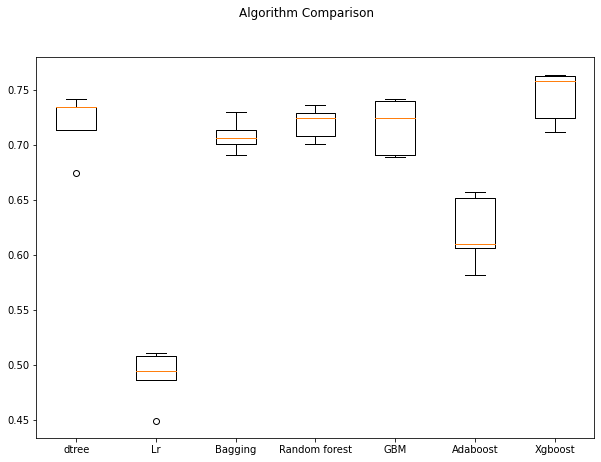

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

Observation:

* It can be observed that Xgboost gives the best performance followed by the dtree,randomforest and GBM

* All our models are generalizing well



### Model Building with Oversampled data


In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_over == 0)))


print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, counts of label '1': 888
Before OverSampling, counts of label '0': 15112 

After OverSampling, counts of label '1': 15112
After OverSampling, counts of label '0': 15112 

After OverSampling, the shape of train_X: (30224, 40)
After OverSampling, the shape of train_y: (30224,) 



In [ ]:
%%time 


models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Lr", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
#models.append(("LightGBM", LGBMClassifier(random_state=1)))
#models.append(("Catboost", CatBoostClassifier(random_state=1,verbose=False)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

dtree: 0.9730683335985987
Lr: 0.8812865538044636
Bagging: 0.9781630048735123
Random forest: 0.9855082794538147
GBM: 0.9239012704933914
Adaboost: 0.8935280870047044
Xgboost: 0.9177470191579975

Validation Performance:

dtree: 0.8198198198198198
Lr: 0.8513513513513513
Bagging: 0.8378378378378378
Random forest: 0.8558558558558559
GBM: 0.8828828828828829
Adaboost: 0.8558558558558559
Xgboost: 0.8693693693693694
CPU times: user 8min 17s, sys: 1.66 s, total: 8min 18s
Wall time: 8min 15s


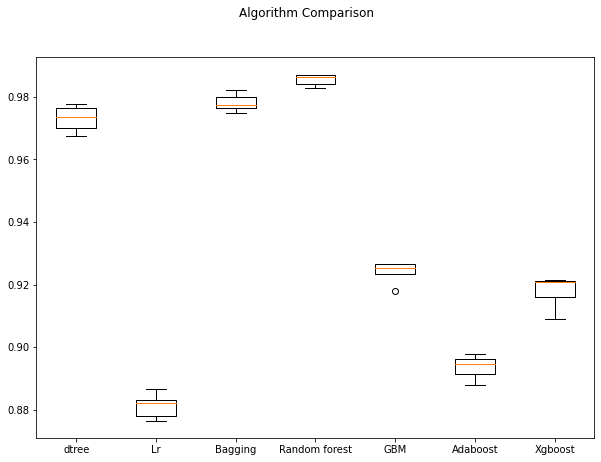

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

Observation:

* The models have improved but now overfitting 

### Model Building with Undersampled data

In [ ]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)


print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0)))


print("After UnderSampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("After UnderSampling, counts of label '0': {} \n".format(sum(y_train_un == 0)))


print("After UnderSampling, the shape of train_X: {}".format(X_train_un.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before UnderSampling, counts of label '1': 888
Before UnderSampling, counts of label '0': 15112 

After UnderSampling, counts of label '1': 888
After UnderSampling, counts of label '0': 888 

After UnderSampling, the shape of train_X: (1776, 40)
After UnderSampling, the shape of train_y: (1776,) 



In [ ]:
%%time 


models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Lr", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
#models.append(("LightGBM", LGBMClassifier(random_state=1)))
#models.append(("Catboost", CatBoostClassifier(random_state=1,verbose=False)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

dtree: 0.8468355233923697
Lr: 0.8513235574176348
Bagging: 0.8704627689963816
Random forest: 0.8975052370976957
GBM: 0.8907446200723672
Adaboost: 0.8715927124992063
Xgboost: 0.8907446200723671

Validation Performance:

dtree: 0.8468468468468469
Lr: 0.8648648648648649
Bagging: 0.8918918918918919
Random forest: 0.8783783783783784
GBM: 0.8873873873873874
Adaboost: 0.8558558558558559
Xgboost: 0.8873873873873874
CPU times: user 22.1 s, sys: 347 ms, total: 22.4 s
Wall time: 22 s


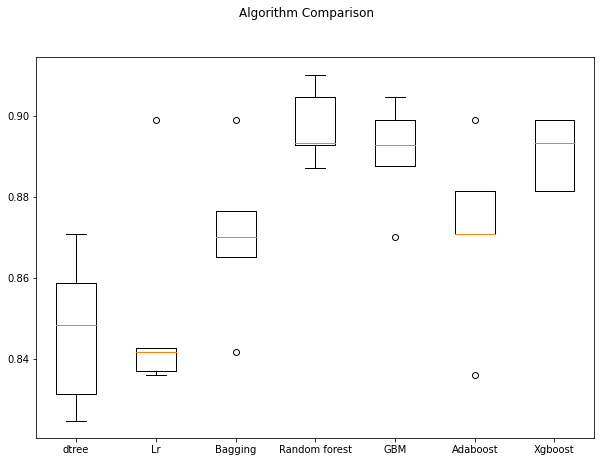

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

Observation:

* The models has signicantly improved compared to the ones with orignal data(without oversampling)

* Models are generalizing well on training and validation set

* I will tune Bagging,GBM and Xgboost with under sampled data as they have higher performance

## HyperparameterTuning 

### Sample Parameter Grids

**Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

- For Gradient Boosting:

param_grid = {
    "n_estimators": np.arange(100,150,25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample":[0.5,0.7], 
    "max_features":[0.5,0.7]
}

- For Adaboost:

param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

- For Bagging Classifier:

param_grid = {
    'max_samples': [0.8,0.9,1], 
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

- For Random Forest:

param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

- For Decision Trees:

param_grid = {
    'max_depth': np.arange(2,6), 
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

- For Logistic Regression:

param_grid = {'C': np.arange(0.1,1.1,0.1)}

- For XGBoost:

param_grid={
    'n_estimators': [150, 200, 250],
    'scale_pos_weight': [5,10],
    'learning_rate': [0.1,0.2],
    'gamma': [0,3,5],
    'subsample': [0.8,0.9]
}

### Tuning Bagging using under sampled data

#### RandomizedSearchCV

In [ ]:
%%time

# defining model
Model =BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { 'max_samples': [0.5,0.6,0.7,0.8,0.9,1], 
              'max_features': [0.5,0.6,0.7,0.8,0.9], 
              'n_estimators' : [20,30,70,100,250,500,750,1000,1250,1500,1750], 
              'base_estimator': [DecisionTreeClassifier(max_depth=3, random_state=1),
                                 DecisionTreeClassifier(max_depth=2, random_state=1),
                                 RandomForestClassifier(max_depth=3,random_state=1),
                                 RandomForestClassifier(max_depth=2,random_state=1),
                                 XGBClassifier(max_depth=2,random_state=1, eval_metric="logloss"),
                                 XGBClassifier(max_depth=3,random_state=1, eval_metric="logloss"),
                                 LGBMClassifier(max_depth=3,random_state=1),
                                 LGBMClassifier(max_depth=2,random_state=1)
              ]
              }
#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 1250, 'max_samples': 1, 'max_features': 0.6, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=1.0:
CPU times: user 6.38 s, sys: 621 ms, total: 7 s
Wall time: 18min 58s


In [ ]:
# building model with best parameters
Bagging_tuned = BaggingClassifier(
    n_estimators=1250,
    max_samples=1,
    random_state=1,
    max_features=0.6,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1)
)

# Fit the model on training data
Bagging_tuned.fit(X_train_un, y_train_un)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                        random_state=1),
                  max_features=0.6, max_samples=1, n_estimators=1250,
                  random_state=1)

In [ ]:
# Calculating different metrics on train set
Bagging_random_train = model_performance_classification_sklearn(
    Bagging_tuned, X_train_un, y_train_un
)
print("Training performance:")
Bagging_random_train

Training performance:


Accuracy  Recall  Precision    F1
0     0.500   1.000      0.500 0.667

In [ ]:
# Calculating different metrics on validation set
Bagging_random_val = model_performance_classification_sklearn(Bagging_tuned, X_val, y_val)
print("Validation performance:")
Bagging_random_val

Validation performance:


Accuracy  Recall  Precision    F1
0     0.056   1.000      0.056 0.105

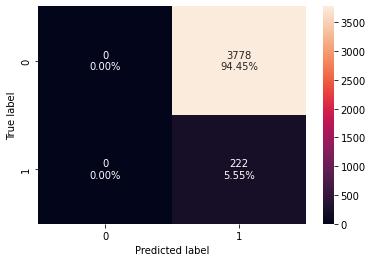

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(Bagging_tuned, X_val, y_val)

### Tuning GBM using over sampled data

#### RandomizedSearchCV

In [ ]:
%%time

# defining model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { "n_estimators": [20,30,100,250,500,750,1000,1250,1500,1750], 
              "learning_rate": [0.15,0.1,0.05,0.01,0.005,0.001],
              "subsample":[0.5,0.7,0.8,0.9,1], 
              "max_features":[2,3,4,5,6,7,8,9],
              "max_depth":[2,3,4,5,6,7]
              }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.5, 'n_estimators': 1750, 'max_features': 3, 'max_depth': 3, 'learning_rate': 0.1} with CV score=0.9850449225253642:
CPU times: user 46.2 s, sys: 386 ms, total: 46.6 s
Wall time: 17min 10s


In [ ]:
# building model with best parameters
GBM_tuned = GradientBoostingClassifier(
    n_estimators=1750,
    learning_rate=0.01,
    random_state=1,
    subsample=0.5,
    max_features=3,
    max_depth=5
)

# Fit the model on training data
GBM_tuned.fit(X_train_over, y_train_over)

GradientBoostingClassifier(learning_rate=0.01, max_depth=5, max_features=3,
                           n_estimators=1750, random_state=1, subsample=0.5)

In [ ]:
# Calculating different metrics on train set
GBM_random_train = model_performance_classification_sklearn(
    GBM_tuned, X_train_over, y_train_over
)
print("Training performance:")
GBM_random_train

Training performance:


Accuracy  Recall  Precision    F1
0     0.989   0.982      0.995 0.988

In [ ]:
# Calculating different metrics on validation set
GBM_random_val = model_performance_classification_sklearn(GBM_tuned, X_val, y_val)
print("Validation performance:")
GBM_random_val

Validation performance:


Accuracy  Recall  Precision    F1
0     0.984   0.874      0.847 0.860

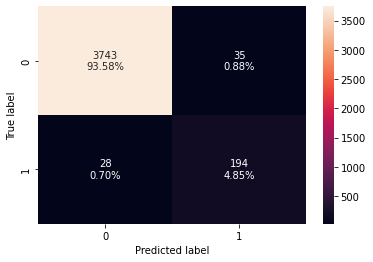

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(GBM_tuned, X_val, y_val)

### Tuning XGB using under sampled data

#### RandomizedSearchCV

In [ ]:
%%time

# defining model
Model = XGBClassifier(random_state=1, eval_metric="logloss")

# Parameter grid to pass in RandomSearchCV
param_grid={"n_estimators": [20,30,100,250,500,750,1000,1250,1500,1750], 
            "learning_rate": [0.15,0.1,0.05,0.01,0.005,0.001],
            'scale_pos_weight': [5,10],
            'gamma': [0,3,5,15,55,100],
            'subsample': [0.7,0.75,0.8,0.85,0.9,0.95,1],
            "colsample_bytree":[0.7,0.9,1],
            "colsample_bylevel":[0.5,0.7,1],
            "max_features":[2,3,4,5,6,7,8,9],
            "max_depth":[2,3,4,5,6,7]
            }
#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 1, 'scale_pos_weight': 10, 'n_estimators': 1500, 'max_features': 6, 'max_depth': 3, 'learning_rate': 0.15, 'gamma': 100, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.7} with CV score=0.9786135974100171:
CPU times: user 4.34 s, sys: 56.2 ms, total: 4.39 s
Wall time: 56.6 s


In [ ]:
# building model with best parameters
XGB_tuned = XGBClassifier(
    subsample=1,
    scale_pos_weight=10,
    max_features= 6,
    max_depth= 3,
    random_state=1,
    n_estimators=1500,
    learning_rate=0.15,
    gamma=100,
    colsample_bylevel=0.7,
    colsample_bytree=0.9
   
    
)

# Fit the model on training data
XGB_tuned.fit(X_train_un, y_train_un)

XGBClassifier(colsample_bylevel=0.7, colsample_bytree=0.9, gamma=100,
              learning_rate=0.15, max_features=6, n_estimators=1500,
              random_state=1, scale_pos_weight=10)

In [ ]:
# Calculating different metrics on train set
XGB_random_train = model_performance_classification_sklearn(
    XGB_tuned, X_train_un, y_train_un
)
print("Training performance:")
XGB_random_train

Training performance:


Accuracy  Recall  Precision    F1
0     0.637   0.990      0.581 0.732

In [ ]:
# Calculating different metrics on validation set
XGB_random_val = model_performance_classification_sklearn(XGB_tuned, X_val, y_val)
print("Validation performance:")
XGB_random_val

Validation performance:


Accuracy  Recall  Precision    F1
0     0.325   0.968      0.074 0.137

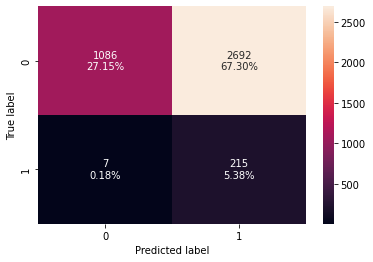

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(XGB_tuned, X_val, y_val)

## Model performance comparison and choosing the final model

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        Bagging_random_train.T,
        GBM_random_train.T,
        XGB_random_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Bagging Classifier tuned with undersampled data",
    "Gradient Boosting tuned with undersampled data",
    "XGBoost tuned with undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Bagging Classifier tuned with undersampled data  \
Accuracy                                             0.500   
Recall                                               1.000   
Precision                                            0.500   
F1                                                   0.667   

           Gradient Boosting tuned with undersampled data  \
Accuracy                                            0.989   
Recall                                              0.982   
Precision                                           0.995   
F1                                                  0.988   

           XGBoost tuned with undersampled data  
Accuracy                                  0.637  
Recall                                    0.990  
Precision                                 0.581  
F1                                        0.732

In [ ]:
# validation performance comparison

models_train_comp_df = pd.concat(
    [
        Bagging_random_val.T,
        GBM_random_val.T,
        XGB_random_val.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Bagging Classifier tuned with undersampled data",
    "Gradient Boosting tuned with undersampled data",
    "XGBoost tuned with undersampled data",
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


Bagging Classifier tuned with undersampled data  \
Accuracy                                             0.056   
Recall                                               1.000   
Precision                                            0.056   
F1                                                   0.105   

           Gradient Boosting tuned with undersampled data  \
Accuracy                                            0.984   
Recall                                              0.874   
Precision                                           0.847   
F1                                                  0.860   

           XGBoost tuned with undersampled data  
Accuracy                                  0.325  
Recall                                    0.968  
Precision                                 0.074  
F1                                        0.137

Obsevation:


* Bagging and XGBoost model are giving very good validation recall but very poor on other metrics , so I will choose The Gradient Boosting(GBM) model tuned that is giving validation recall of 87.4% and also good on other metrics.
* Let's check the model's performance on test set and then see the feature importance from the tuned GBM model

### Test set final performance

In [ ]:
# Calculating different metrics on validation set
GBM_random_test = model_performance_classification_sklearn(GBM_tuned, X_test, y_test)
print("Testing performance:")
GBM_random_test

Testing performance:


Accuracy  Recall  Precision    F1
0     0.981   0.855      0.823 0.838

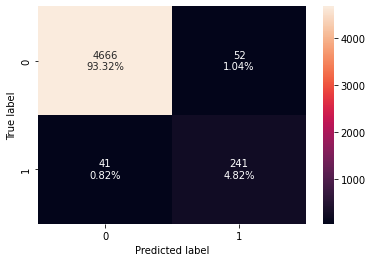

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(GBM_tuned, X_test, y_test)

Observation:

* The GBM model is performing well on the testing data

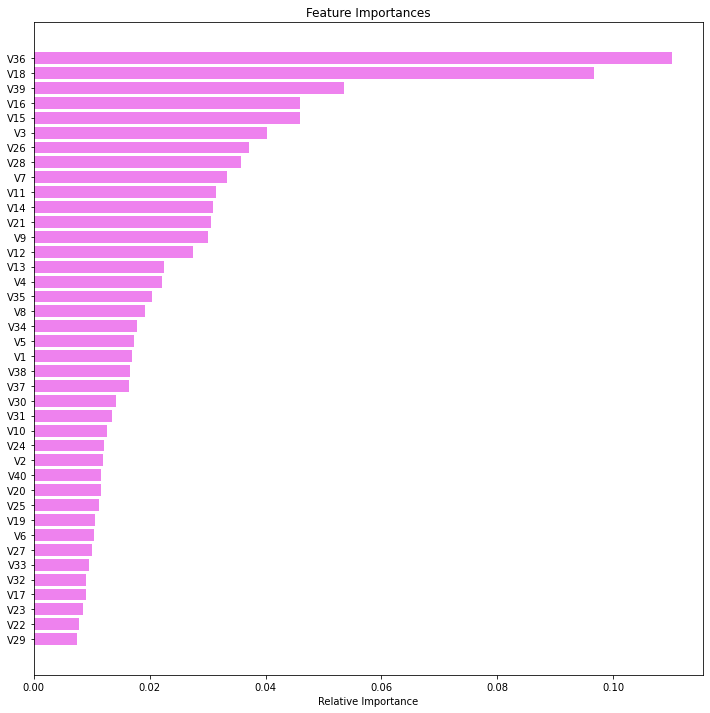

In [ ]:
feature_names = X_train.columns
importances = GBM_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Pipelines to build the final model


In [ ]:
# creating a list of numerical variables
numerical_features = [
    "V1",
    "V2",
    "V3",
    "V4",
    "V5",
    "V5",
    "V6",
    "V7",
    "V8",
    "V9",
    "V10",
    "V11",
    "V12",
    "V13",
    "V14",
    "V15",
    "V16",
    "V17",
    "V18",
    "V19",
    "V20",
    "V21",
    "V22",
    "V23",
    "V24",
    "V25",
    "V26",
    "V27",
    "V28",
    "V29",
    "V30",
    "V31",
    "V32",
    "V33",
    "V34",
    "V35",
    "V36",
    "V37",
    "V38",
    "V39",

]

In [ ]:
# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])
#numeric_transformer = Pipeline(steps=[('Outlier_clipping', FunctionSampler(func=treat_outliers, validate = False))])



In [ ]:
# Dividing train data into X and y 
X=df1.drop('Target',axis=1)
y=df1['Target']

In [ ]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=1, stratify=y
)
print(X_train.shape, X_test.shape)

(16000, 40) (4000, 40)


In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
    ],
    remainder="passthrough",
)

In [ ]:
# Creating new pipeline with best parameters
model_pipeline = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "Tuned GBM",
           GradientBoostingClassifier(
    n_estimators=1750,
    learning_rate=0.01,
    random_state=1,
    subsample=0.5,
    max_features=3,
    max_depth=5
        ),
        ),
    ]
)
# Fit the model on training data
model_pipeline .fit(X_train, y_train)




Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['V1', 'V2', 'V3', 'V4', 'V5',
                                                   'V5', 'V6', 'V7', 'V8', 'V9',
                                                   'V10', 'V11', 'V12', 'V13',
                                                   'V14', 'V15', 'V16', 'V17',
                                                   'V18', 'V19', 'V20', 'V21',
                                                   'V22', 'V23', 'V24', 'V25',
                                                   'V26', 'V27', 'V28', 'V29', ...])])),
                ('Tuned GBM',
                 GradientBoostingClassifier(learning_rate=0.01, max_depth=5,
   

In [ ]:
# Let's check the performance on test set
Model_test = model_performance_classification_sklearn(model_pipeline , X_test, y_test)
Model_test

Accuracy  Recall  Precision    F1
0     0.987   0.784      0.972 0.868

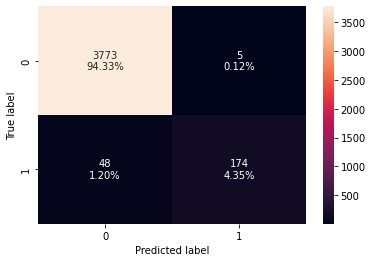

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(model_pipeline , X_test, y_test)

# Business Insights and Conclusions

* V36,V18,V39,V16,V15,V3,V26,V28,V7,V11 are the top 10 most important feauters

* When the value of V39 is -0.7861957355 and less , then company should consider doing maintenance as the machine can fail anytime

* When the value of V36 is -2.1181190715 and less , then company should consider doing maintenance as the machine can fail anytime

* When the value of V18 is -1.87314185 and less , then company should consider doing maintenance as the machine can fail anytime

* When the value of V16 is 1.1903440035 and above , company should consider doing maintenance as the machine can fail anytime

* When the value of V15 is 1.1251593605 and above , company should consider doing maintenance as the machine can fail anytime

* When the value of V3 is -0.42922519049999996 and less , then company should consider doing maintenance as the machine can fail anytime

* When the value of V26 is -0.9190658570000001 and less , then company should consider doing maintenance as the machine can fail anytime

* When the value of V28 is 0.7703536155 and above , company should consider doing maintenance as the machine can fail anytime

* When the value of V7 is 0.8637946519999999 and above , company should consider doing maintenance as the machine can fail anytime

* When the value of V11 is  0.7759778795000001 and above , company should consider doing maintenance as the machine can fail anytime

* When V15 is increasing ,it implies that V7 is increasing too as they are positively correlated, so the company should monitor one to decide when to do maintenance

* When V5 increases ,V11 increases too

* When V8 increases ,V16 increases too

* When V9 is decreasing  ,it implies that V16 is increasing as they are negatively correlated, so the company should monitor one to decide when to do maintenance